In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

# Processing Data : A set of data

In [27]:
DATA_FOLDER = "/content/drive/MyDrive/Random/Hiroshima/ABC2025/Test"
USER_ID = "T1N01"
keypoint_csv = f"{DATA_FOLDER}/Body_KeyPoint_CSV/Front_{USER_ID}.csv"
ann_csv = f"{DATA_FOLDER}/Annotation_CSV/Front_{USER_ID}.csv"

TEST_ID = "T1N02"
test_keypoint_csv = f"{DATA_FOLDER}/Body_KeyPoint_CSV/Front_{TEST_ID}.csv"
test_ann_csv = f"{DATA_FOLDER}/Annotation_CSV/Front_{TEST_ID}.csv"

In [28]:
FS = 33 # sampling rate
TOTAL_CLASSESS = 17

In [29]:
def load_data(keypoint_csv, ann_csv):
  kp_df = pd.read_csv(keypoint_csv)
  kp_df = kp_df.loc[:, ~kp_df.columns.str.contains('^Unnamed')]

  ann_df = pd.read_csv(ann_csv)
  ann_df = ann_df.loc[:, ~ann_df.columns.str.contains('^Unnamed')]

  return kp_df, ann_df

In [30]:
kp_df, ann_df = load_data(keypoint_csv, ann_csv)

test_kp_df, test_ann_df = load_data(test_keypoint_csv, test_ann_csv)

In [31]:
kp_df.head(5)

,Frame,nose_x,nose_y,right_eye_x,right_eye_y,left_eye_x,left_eye_y,right_ear_x,right_ear_y,left_ear_x,...,left_hip_x,left_hip_y,right_knee_x,right_knee_y,left_knee_x,left_knee_y,right_ankle_x,right_ankle_y,left_ankle_x,left_ankle_y
0,0,1364.780029,403.205261,1378.596924,384.266327,1346.834717,385.245758,1397.864502,370.577148,1314.710815,...,1302.243896,729.174500,1417.162354,902.614136,1315.615967,905.859192,0.0,0.0,0.0,0.0
1,1,1364.797485,403.248596,1378.954956,384.142212,1346.738403,385.070129,1398.416992,370.440399,1314.609863,...,1300.799316,729.193176,1408.048828,906.449585,1312.477051,908.758301,0.0,0.0,0.0,0.0
2,2,1363.932007,402.823120,1378.628418,383.800537,1346.098022,384.169312,1399.323364,370.684998,1314.839600,...,1299.792847,730.928589,1407.651367,911.246460,1312.401733,912.987854,0.0,0.0,0.0,0.0
3,3,1365.482178,403.973969,1380.023438,384.729736,1347.542236,385.305176,1400.191650,370.839844,1315.760376,...,1297.041504,735.432312,1406.995850,917.398499,1310.173950,917.882080,0.0,0.0,0.0,0.0
4,4,1365.764160,404.822815,1381.149414,386.152405,1347.958374,385.927856,1402.605225,372.927551,1316.344360,...,1296.876465,732.538147,1404.089355,913.385193,1307.855103,914.270508,0.0,0.0,0.0,0.0


In [32]:
ann_df.head(5)

,start_time,stop_time,annotation
0,0,2.0,Others
1,2,9.0,Explanation to patient
2,9,19.0,Confirm necessary items
3,19,26.0,Disinfect hands
4,26,38.0,Wearing gloves


In [33]:
keypoint_position = "left_wrist"  # choose keypoint you want to visualize

In [34]:
KEYPOINTS_DICT = {"nose": 0,
                  "right_eye": 1,
                  "left_eye": 2,
                  "right_ear": 3,
                  "left_ear": 4,
                  "right_shoulder": 5,
                  "left_shoulder": 6,
                  "right_elbow": 7,
                  "left_elbow": 8,
                  "right_wrist": 9,
                  "left_wrist": 10,
                  "right_hip": 11,
                  "left_hip": 12,
                  "right_knee": 13,
                  "left_knee": 14,
                  "right_ankle": 15,
                  "left_ankle": 16}

values = np.array(kp_df)[:, int(KEYPOINTS_DICT[keypoint_position]*2):int(KEYPOINTS_DICT[keypoint_position]*2 + 2)]

<Figure size 3000x1500 with 0 Axes>

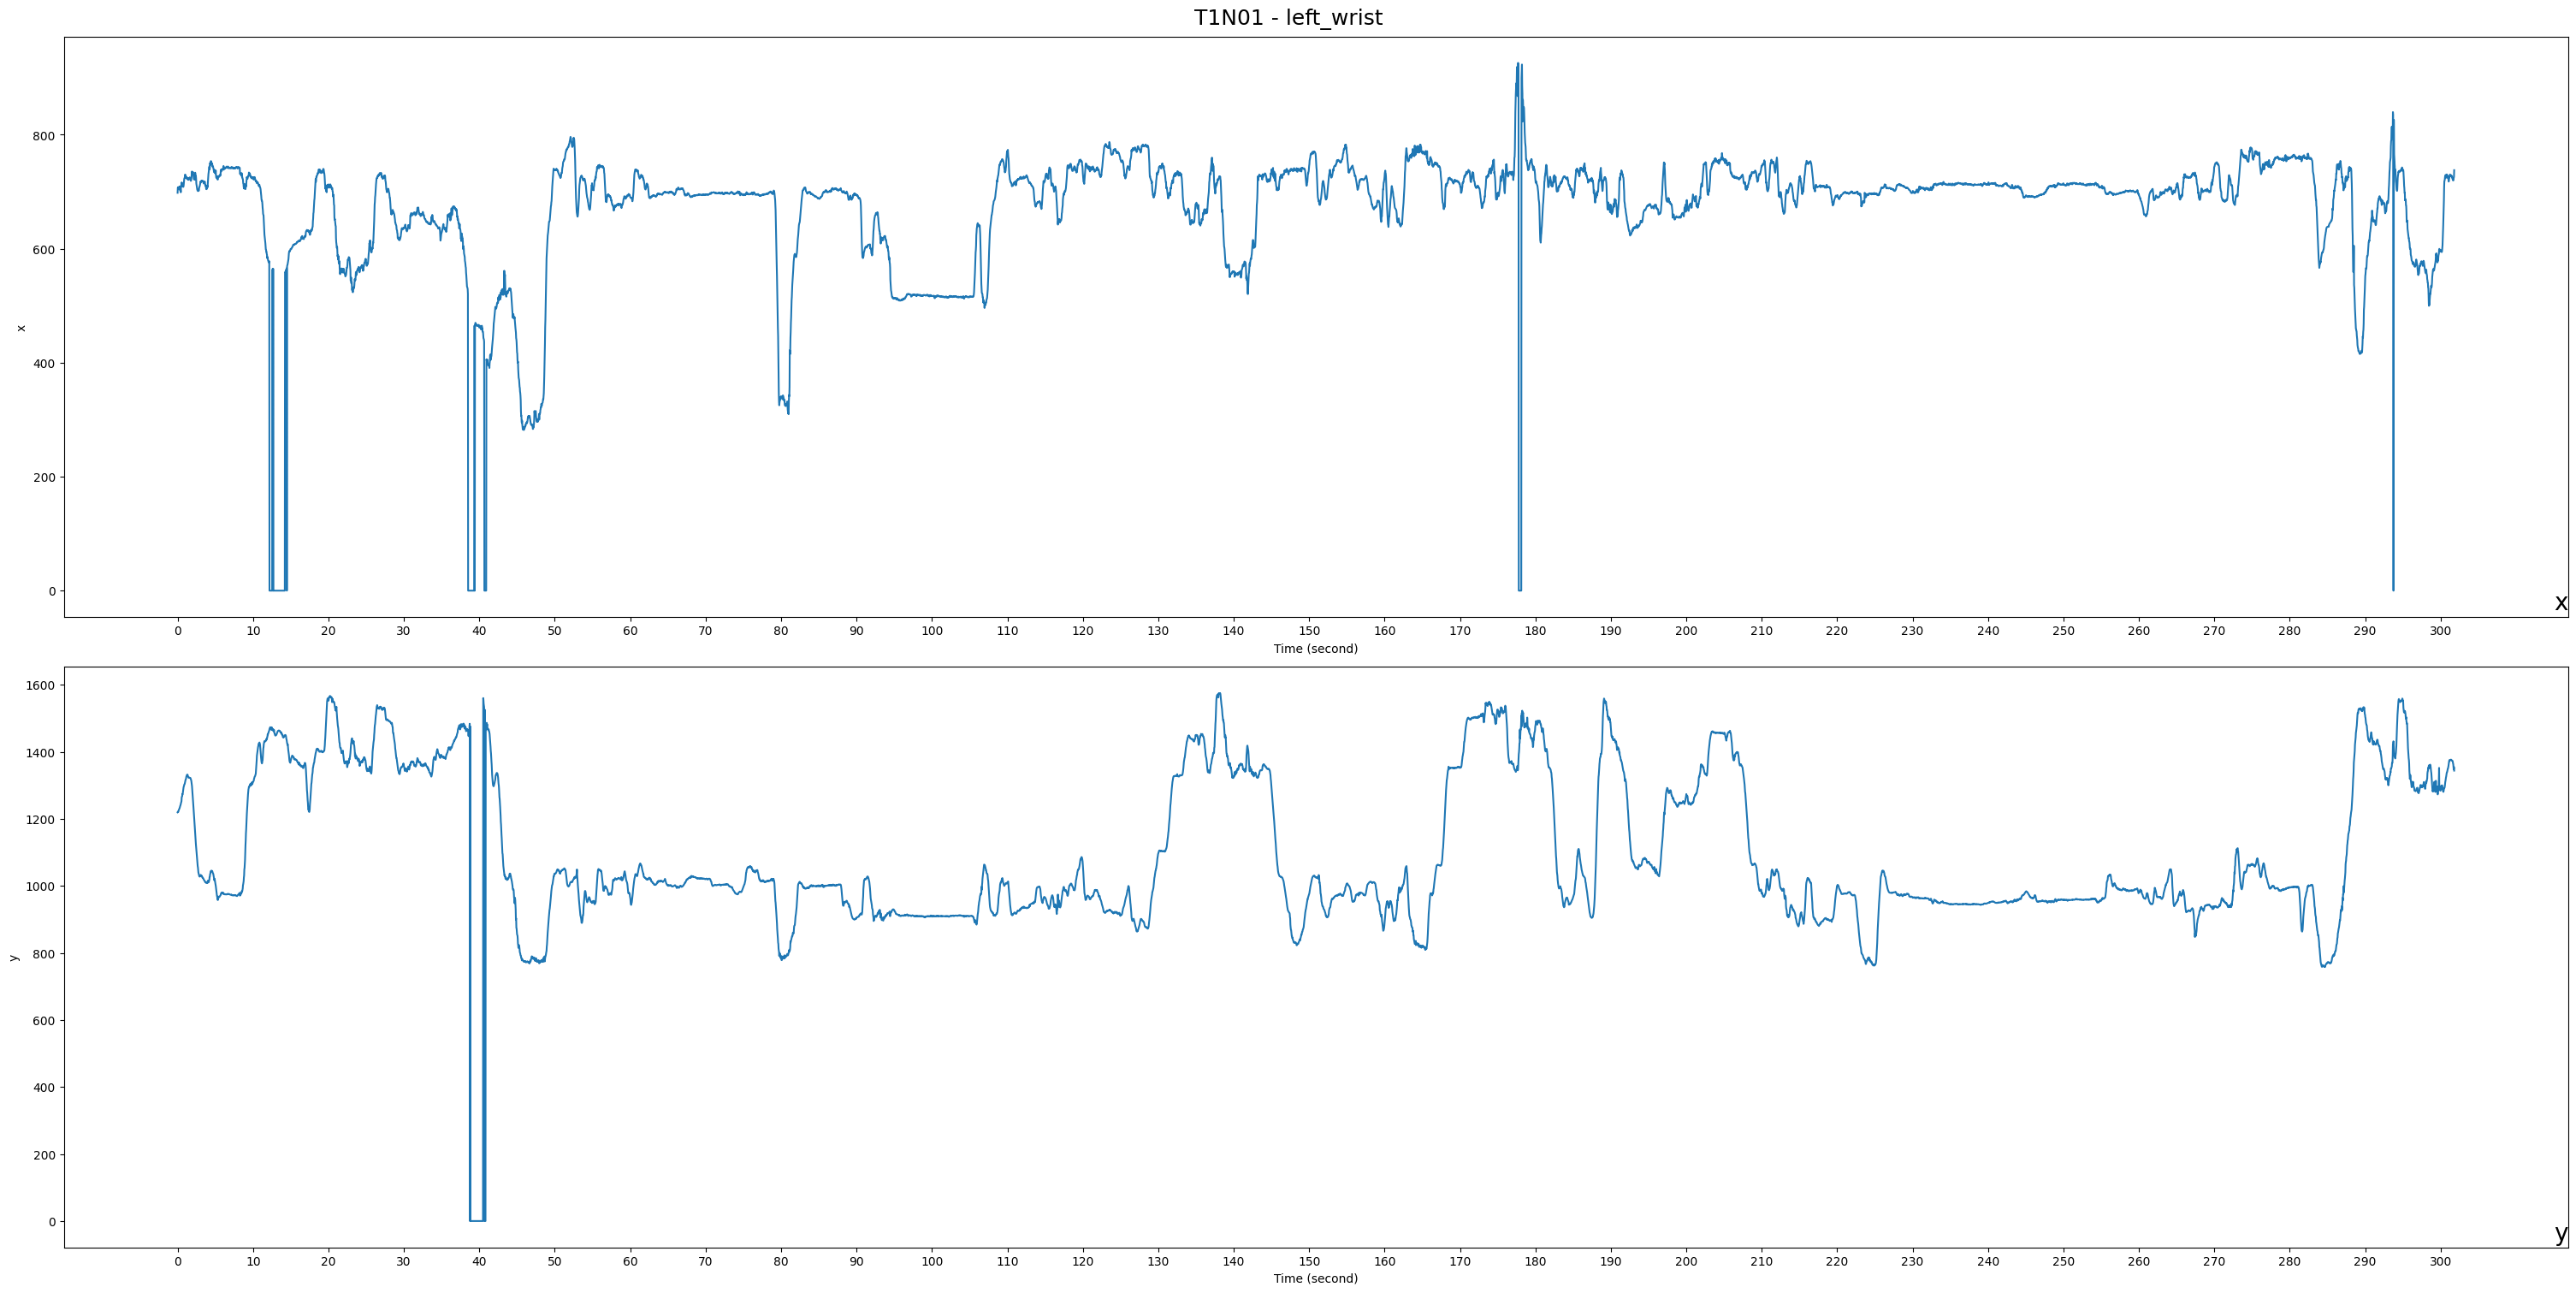

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,15))
fig, axs = plt.subplots(2, 1, figsize=(30,15),  layout="constrained")
cols_name = ["x", "y"]
for x in range(2):
    axs[x].plot(values[:, x])
    axs[x].set_title(cols_name[x], y=0, loc='right', fontsize=20)
    axs[x].set_xlabel("Time (second)")
    axs[x].set_ylabel(cols_name[x])

x_ticks = np.arange(0, len(values), 10*FS)
x_ticklabels = np.arange(0, len(x_ticks))*10
plt.setp(axs, xticks=x_ticks, xticklabels=x_ticklabels)
fig.suptitle('{} - {}'.format(USER_ID, keypoint_position), size=18)
plt.show()

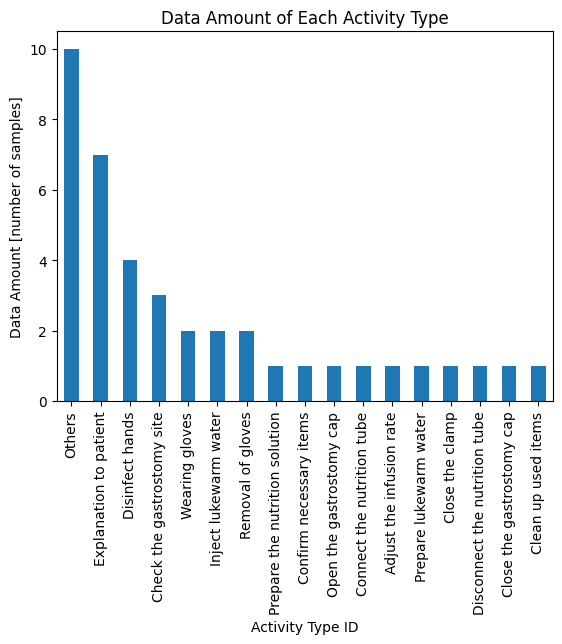

In [36]:
tmp_data_count = ann_df['annotation'].value_counts()
tmp_data_count.plot(kind='bar')
plt.title('Data Amount of Each Activity Type')
plt.xlabel('Activity Type ID')
plt.ylabel('Data Amount [number of samples]')

plt.show()

del tmp_data_count

In [37]:
def remove_redundant_kp(kp_df):
  kp_df = kp_df.loc[:, ~kp_df.columns.str.contains(
      'Frame|conf|left_knee|right_knee|left_ankle|right_ankle', regex=True)]
  return kp_df

In [38]:
kp_df = remove_redundant_kp(kp_df)

test_kp_df = remove_redundant_kp(test_kp_df)

In [39]:
kp_df.head(5)

,nose_x,nose_y,right_eye_x,right_eye_y,left_eye_x,left_eye_y,right_ear_x,right_ear_y,left_ear_x,left_ear_y,...,left_elbow_x,left_elbow_y,right_wrist_x,right_wrist_y,left_wrist_x,left_wrist_y,right_hip_x,right_hip_y,left_hip_x,left_hip_y
0,1364.780029,403.205261,1378.596924,384.266327,1346.834717,385.245758,1397.864502,370.577148,1314.710815,372.902649,...,1229.228516,577.201660,1479.378296,698.075134,1219.525879,685.925415,1407.766968,727.873291,1302.243896,729.174500
1,1364.797485,403.248596,1378.954956,384.142212,1346.738403,385.070129,1398.416992,370.440399,1314.609863,372.583191,...,1229.165527,579.255920,1472.760010,707.029053,1220.000732,688.435303,1405.897461,728.619751,1300.799316,729.193176
2,1363.932007,402.823120,1378.628418,383.800537,1346.098022,384.169312,1399.323364,370.684998,1314.839600,371.637878,...,1229.689209,581.157715,1469.170532,706.115601,1221.508667,691.662476,1404.958984,730.775879,1299.792847,730.928589
3,1365.482178,403.973969,1380.023438,384.729736,1347.542236,385.305176,1400.191650,370.839844,1315.760376,372.319214,...,1231.763916,582.116882,1466.196899,707.922546,1221.054321,697.299500,1403.083374,735.944214,1297.041504,735.432312
4,1365.764160,404.822815,1381.149414,386.152405,1347.958374,385.927856,1402.605225,372.927551,1316.344360,372.553284,...,1233.938843,581.553101,1465.151123,704.863281,1223.700684,694.016785,1403.159668,733.395020,1296.876465,732.538147


In [40]:
SMOOTH_LEN = 3 # seconds

def smooth_kp(kp_col):
  zero_idx = np.flatnonzero(kp_col == 0)
  split_idx = np.split(zero_idx, np.flatnonzero(np.diff(zero_idx) > 1) + 1)
  for each_split_idx in split_idx:
    if len(each_split_idx) == 0 or each_split_idx[0] == 0 or each_split_idx[-1] == (len(kp_col) - 1) or len(each_split_idx) > SMOOTH_LEN*FS:
      continue
    xp = [each_split_idx[0] - 1, each_split_idx[-1] + 1]
    fp = kp_col[xp]
    interp_kp = np.interp(each_split_idx, xp, fp)
    kp_col[each_split_idx] = interp_kp
  return kp_col

In [41]:
for i in range(len(kp_df.columns)):
    kp_df.iloc[:, i] = smooth_kp(np.array(kp_df.iloc[:, i]))
    test_kp_df.iloc[:, i] = smooth_kp(np.array(test_kp_df.iloc[:, i]))

<Figure size 3000x1500 with 0 Axes>

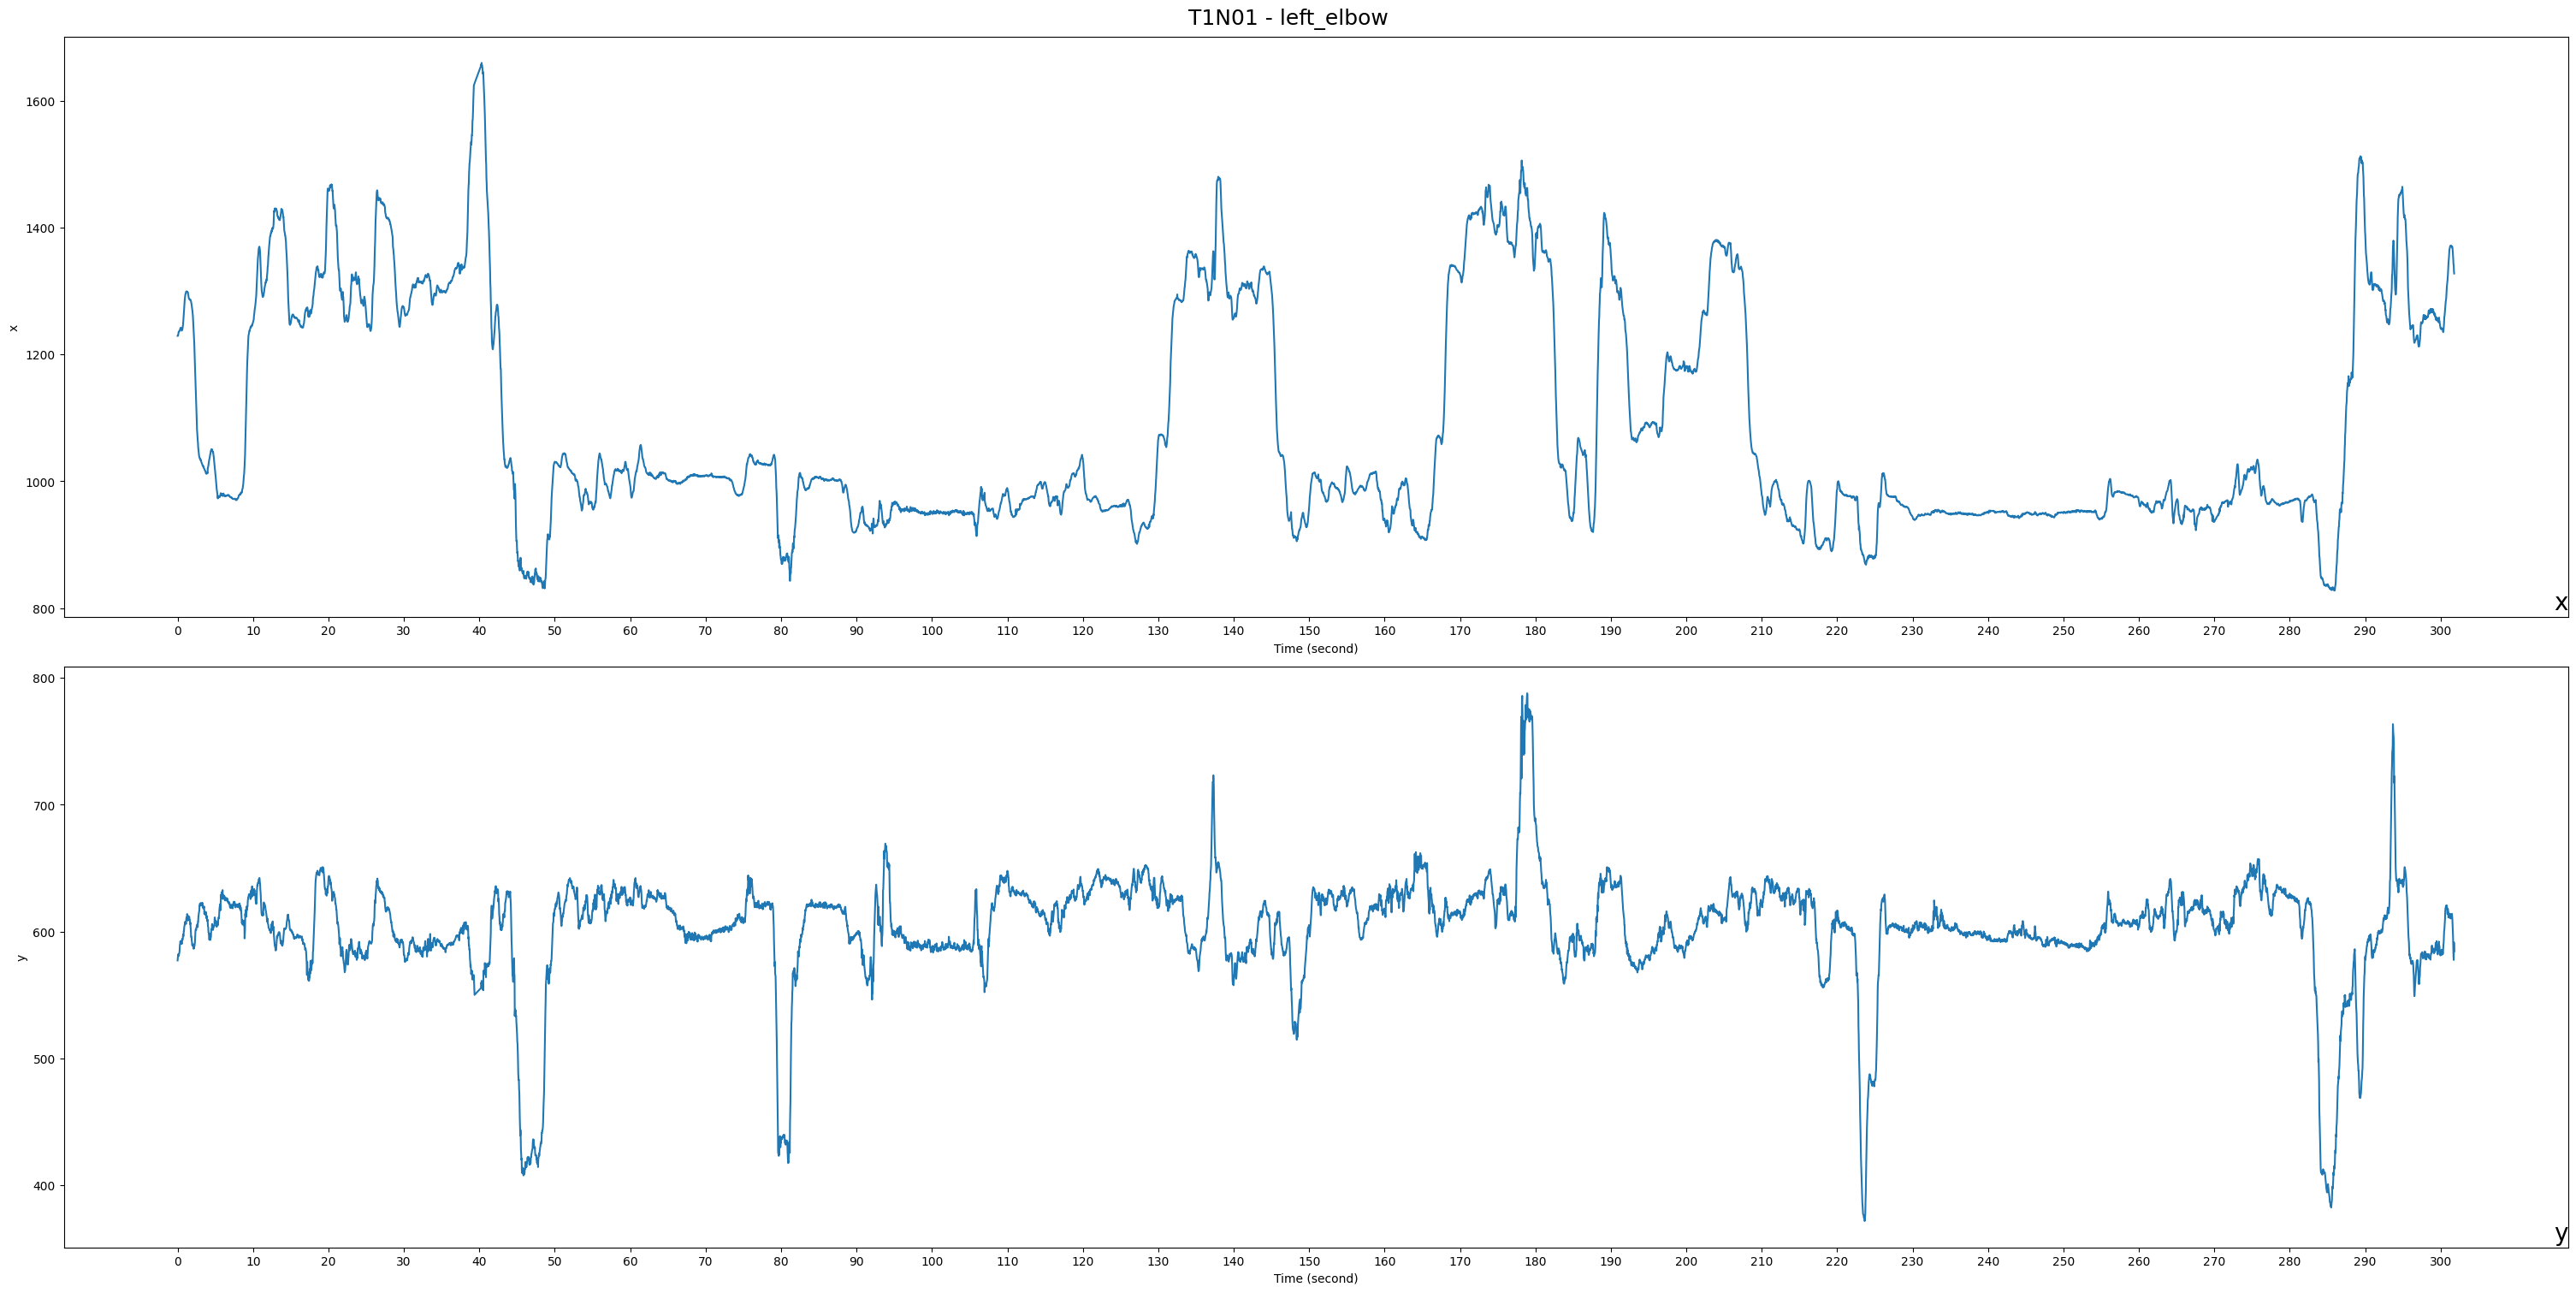

In [42]:
keypoint_position = "left_elbow"  # choose keypoint you want to visualize
values = np.array(kp_df)[:, int(KEYPOINTS_DICT[keypoint_position]*2):int(KEYPOINTS_DICT[keypoint_position]*2 + 2)]

fig = plt.figure(figsize=(30,15))
fig, axs = plt.subplots(2, 1, figsize=(30,15),  layout="constrained")
cols_name = ["x", "y"]
for x in range(2):
    axs[x].plot(values[:, x])
    axs[x].set_title(cols_name[x], y=0, loc='right', fontsize=20)
    axs[x].set_xlabel("Time (second)")
    axs[x].set_ylabel(cols_name[x])

x_ticks = np.arange(0, len(values), 10*FS)
x_ticklabels = np.arange(0, len(x_ticks))*10
plt.setp(axs, xticks=x_ticks, xticklabels=x_ticklabels)
fig.suptitle('{} - {}'.format(USER_ID, keypoint_position), size=18)
plt.show()

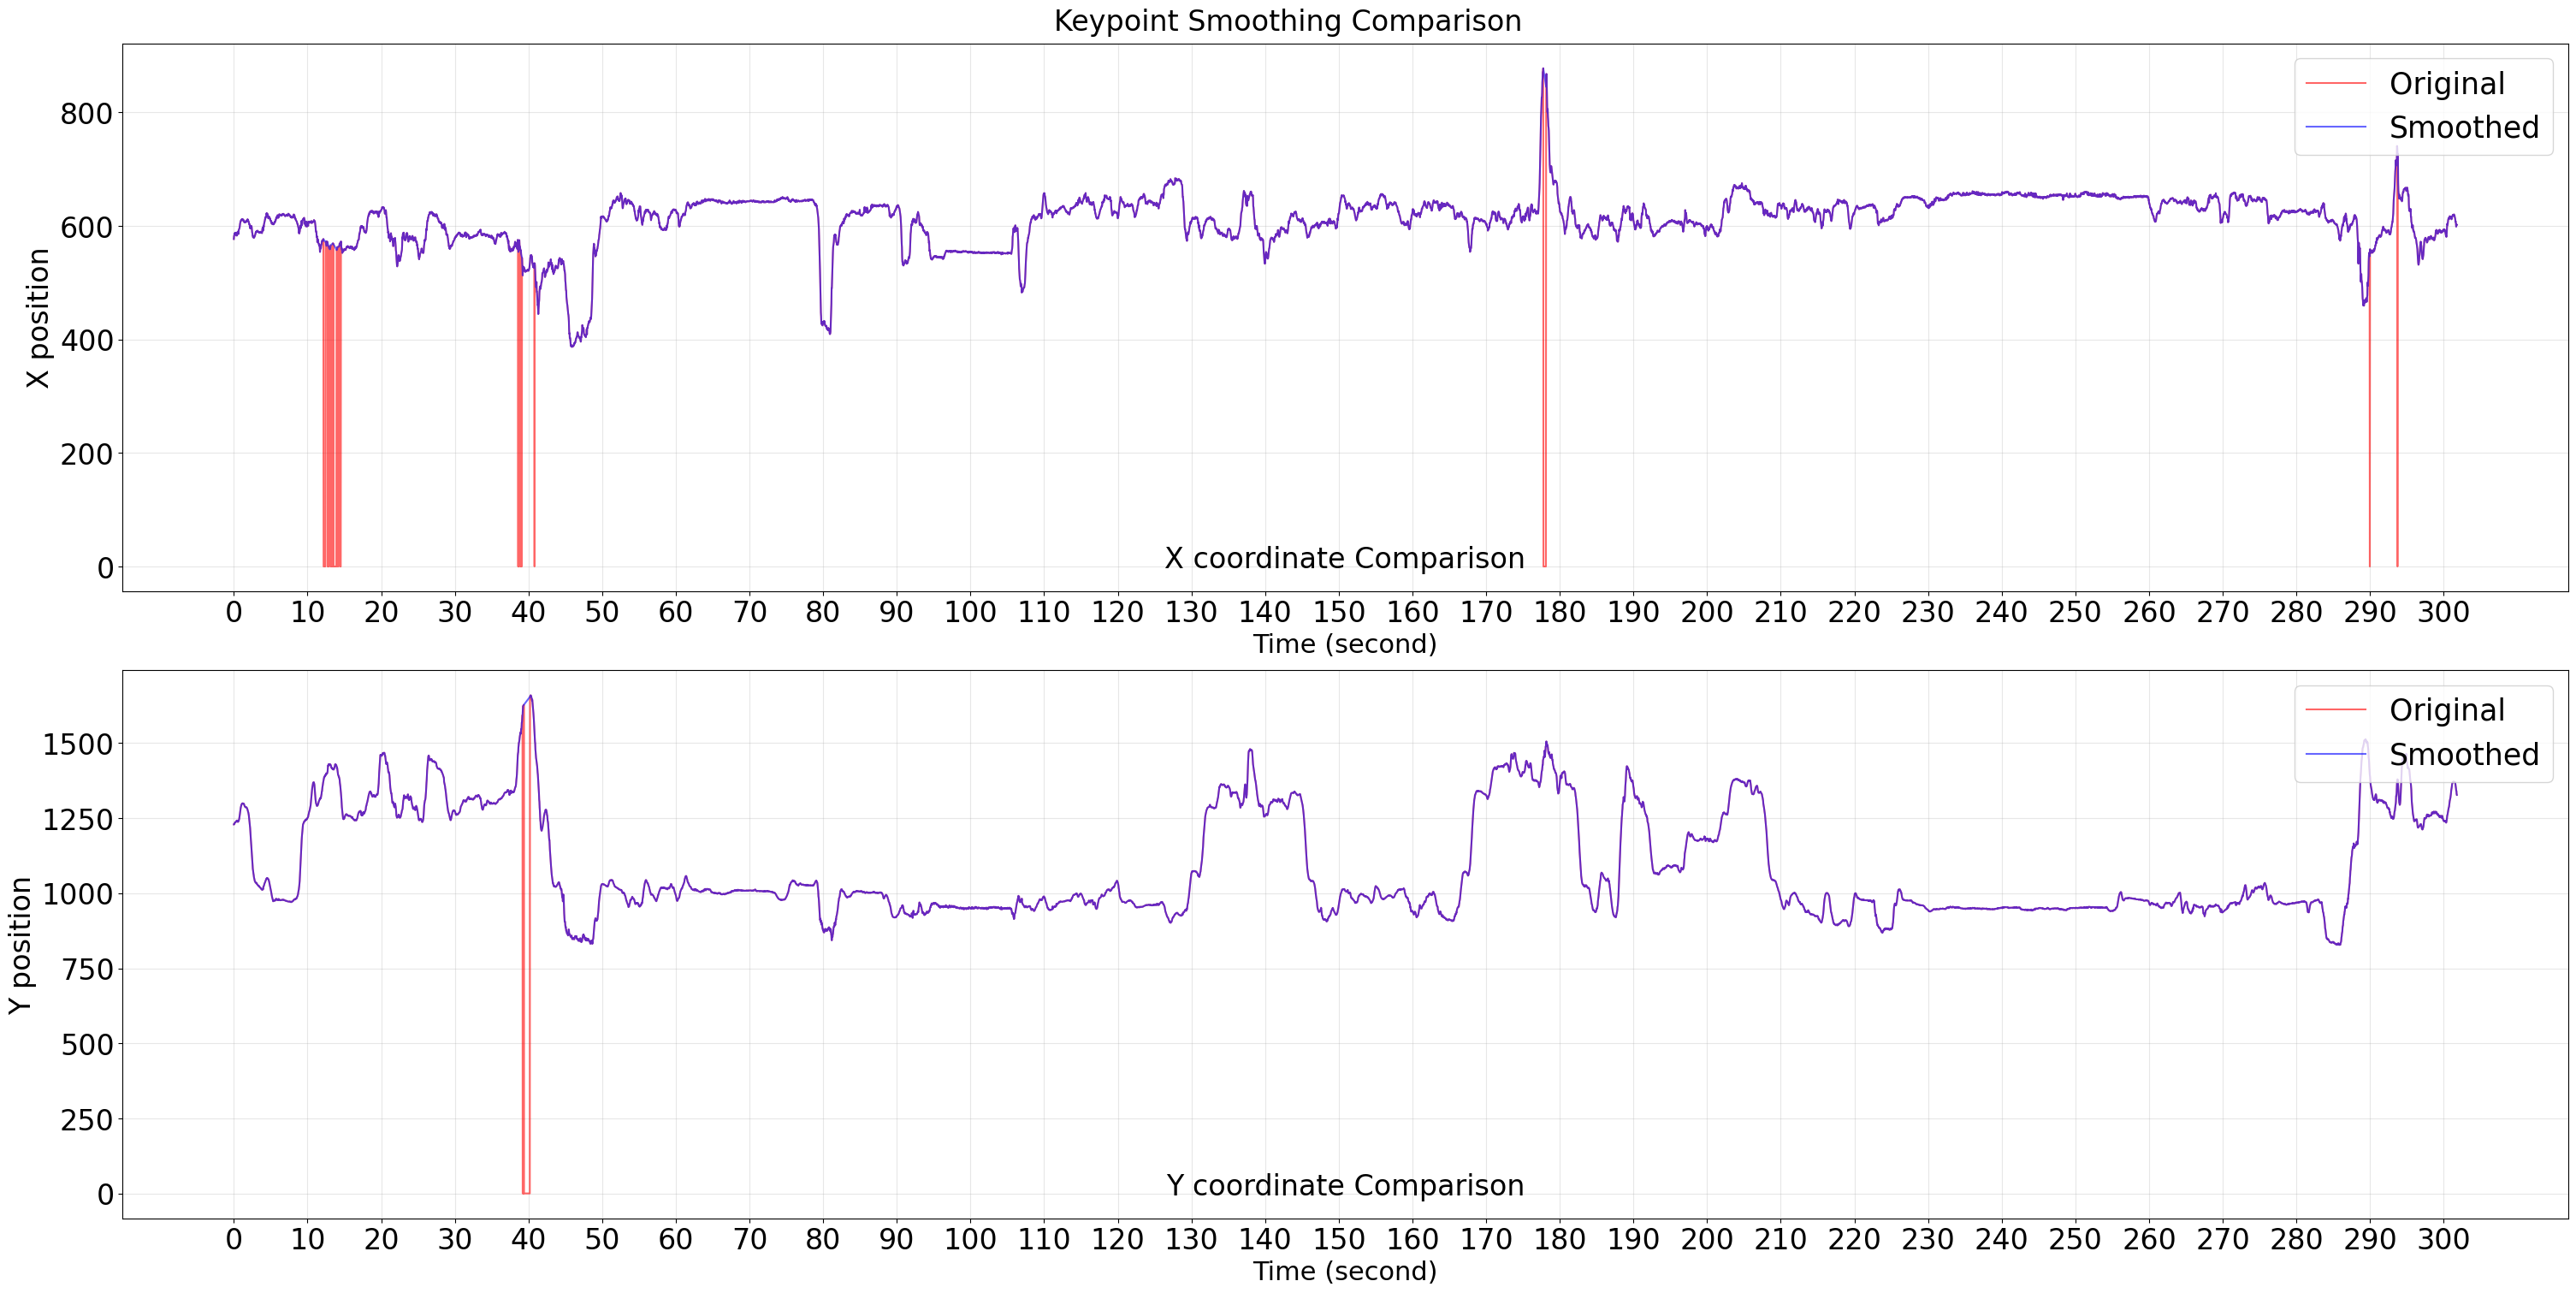


Smoothing Statistics:
Number of modified points in X coordinate: 68
Number of modified points in Y coordinate: 31
Max difference in X coordinate: 875.17
Max difference in Y coordinate: 1653.69


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 从一个用户数据开始
USER_ID = "T1N01"  # 选择一个用户ID
keypoint_position = "left_elbow"  # 选择要观察的关键点

# 确保 KEYPOINTS_DICT 定义正确
KEYPOINTS_DICT = {
    "left_elbow": 8,  # 具体索引需要根据你的数据格式调整
    # ... 其他关键点的定义
}

# 读取该用户的数据
keypoint_csv = f"{DATA_FOLDER}/Body_KeyPoint_CSV/Front_{USER_ID}.csv"
kp_df_raw = pd.read_csv(keypoint_csv)
kp_df = kp_df_raw.loc[:, ~kp_df_raw.columns.str.contains('^Unnamed')]

def visualize_keypoint_smoothing_comparison(kp_df_orig, keypoint_position, USER_ID, FS=33, SMOOTH_LEN=3):
    """
    可视化关键点平滑前后的对比
    """
    # 复制原始数据，以免修改原始数据框
    kp_df = kp_df_orig.copy()

    # 获取特定关键点的列
    idx = int(KEYPOINTS_DICT[keypoint_position]*2)
    values_raw = np.array(kp_df)[:, idx:idx+2]

    # 创建平滑后的数据副本
    values_smoothed = values_raw.copy()
    values_smoothed[:, 0] = smooth_kp(values_smoothed[:, 0].copy())
    values_smoothed[:, 1] = smooth_kp(values_smoothed[:, 1].copy())

    # 创建2x1的子图布局
    fig, axs = plt.subplots(2, 1, figsize=(30, 15), layout="constrained")

    # 设置总标题
    fig.suptitle('Keypoint Smoothing Comparison', size=24)

    # 左上：绘制X坐标对比
    axs[0].plot(values_raw[:, 0], 'r', label='Original', alpha=0.6)
    axs[0].plot(values_smoothed[:, 0], 'b', label='Smoothed', alpha=0.6)
    axs[0].set_title('X coordinate Comparison', y=0, pad=20, fontsize=24)
    axs[0].tick_params(axis='both', which='major', labelsize=24)
    axs[0].set_xlabel("Time (second)", fontsize=22)
    axs[0].set_ylabel("X position", fontsize=24)
    axs[0].legend(fontsize=25, loc='upper right')  # 增大字体到32

    # 左下：绘制Y坐标对比
    axs[1].plot(values_raw[:, 1], 'r', label='Original', alpha=0.6)
    axs[1].plot(values_smoothed[:, 1], 'b', label='Smoothed', alpha=0.6)
    axs[1].set_title('Y coordinate Comparison', y=0, pad=20, fontsize=24)
    axs[1].tick_params(axis='both', which='major', labelsize=24)
    axs[1].set_xlabel("Time (second)", fontsize=22)
    axs[1].set_ylabel("Y position", fontsize=24)
    axs[1].legend(fontsize=25, loc='upper right')  # 增大字体到32

    # 设置时间轴刻度
    x_ticks = np.arange(0, len(values_raw), 10*FS)
    x_ticklabels = np.arange(0, len(x_ticks))*10

    # 为所有子图设置相同的x轴刻度并添加网格
    for ax in axs:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticklabels)
        ax.grid(True, alpha=0.3)

    plt.show()

    # 打印统计信息
    print("\nSmoothing Statistics:")
    x_diff = values_smoothed[:, 0] - values_raw[:, 0]
    y_diff = values_smoothed[:, 1] - values_raw[:, 1]
    print(f"Number of modified points in X coordinate: {np.sum(x_diff != 0)}")
    print(f"Number of modified points in Y coordinate: {np.sum(y_diff != 0)}")
    print(f"Max difference in X coordinate: {np.abs(x_diff).max():.2f}")
    print(f"Max difference in Y coordinate: {np.abs(y_diff).max():.2f}")

# 运行可视化
visualize_keypoint_smoothing_comparison(kp_df, keypoint_position, USER_ID)

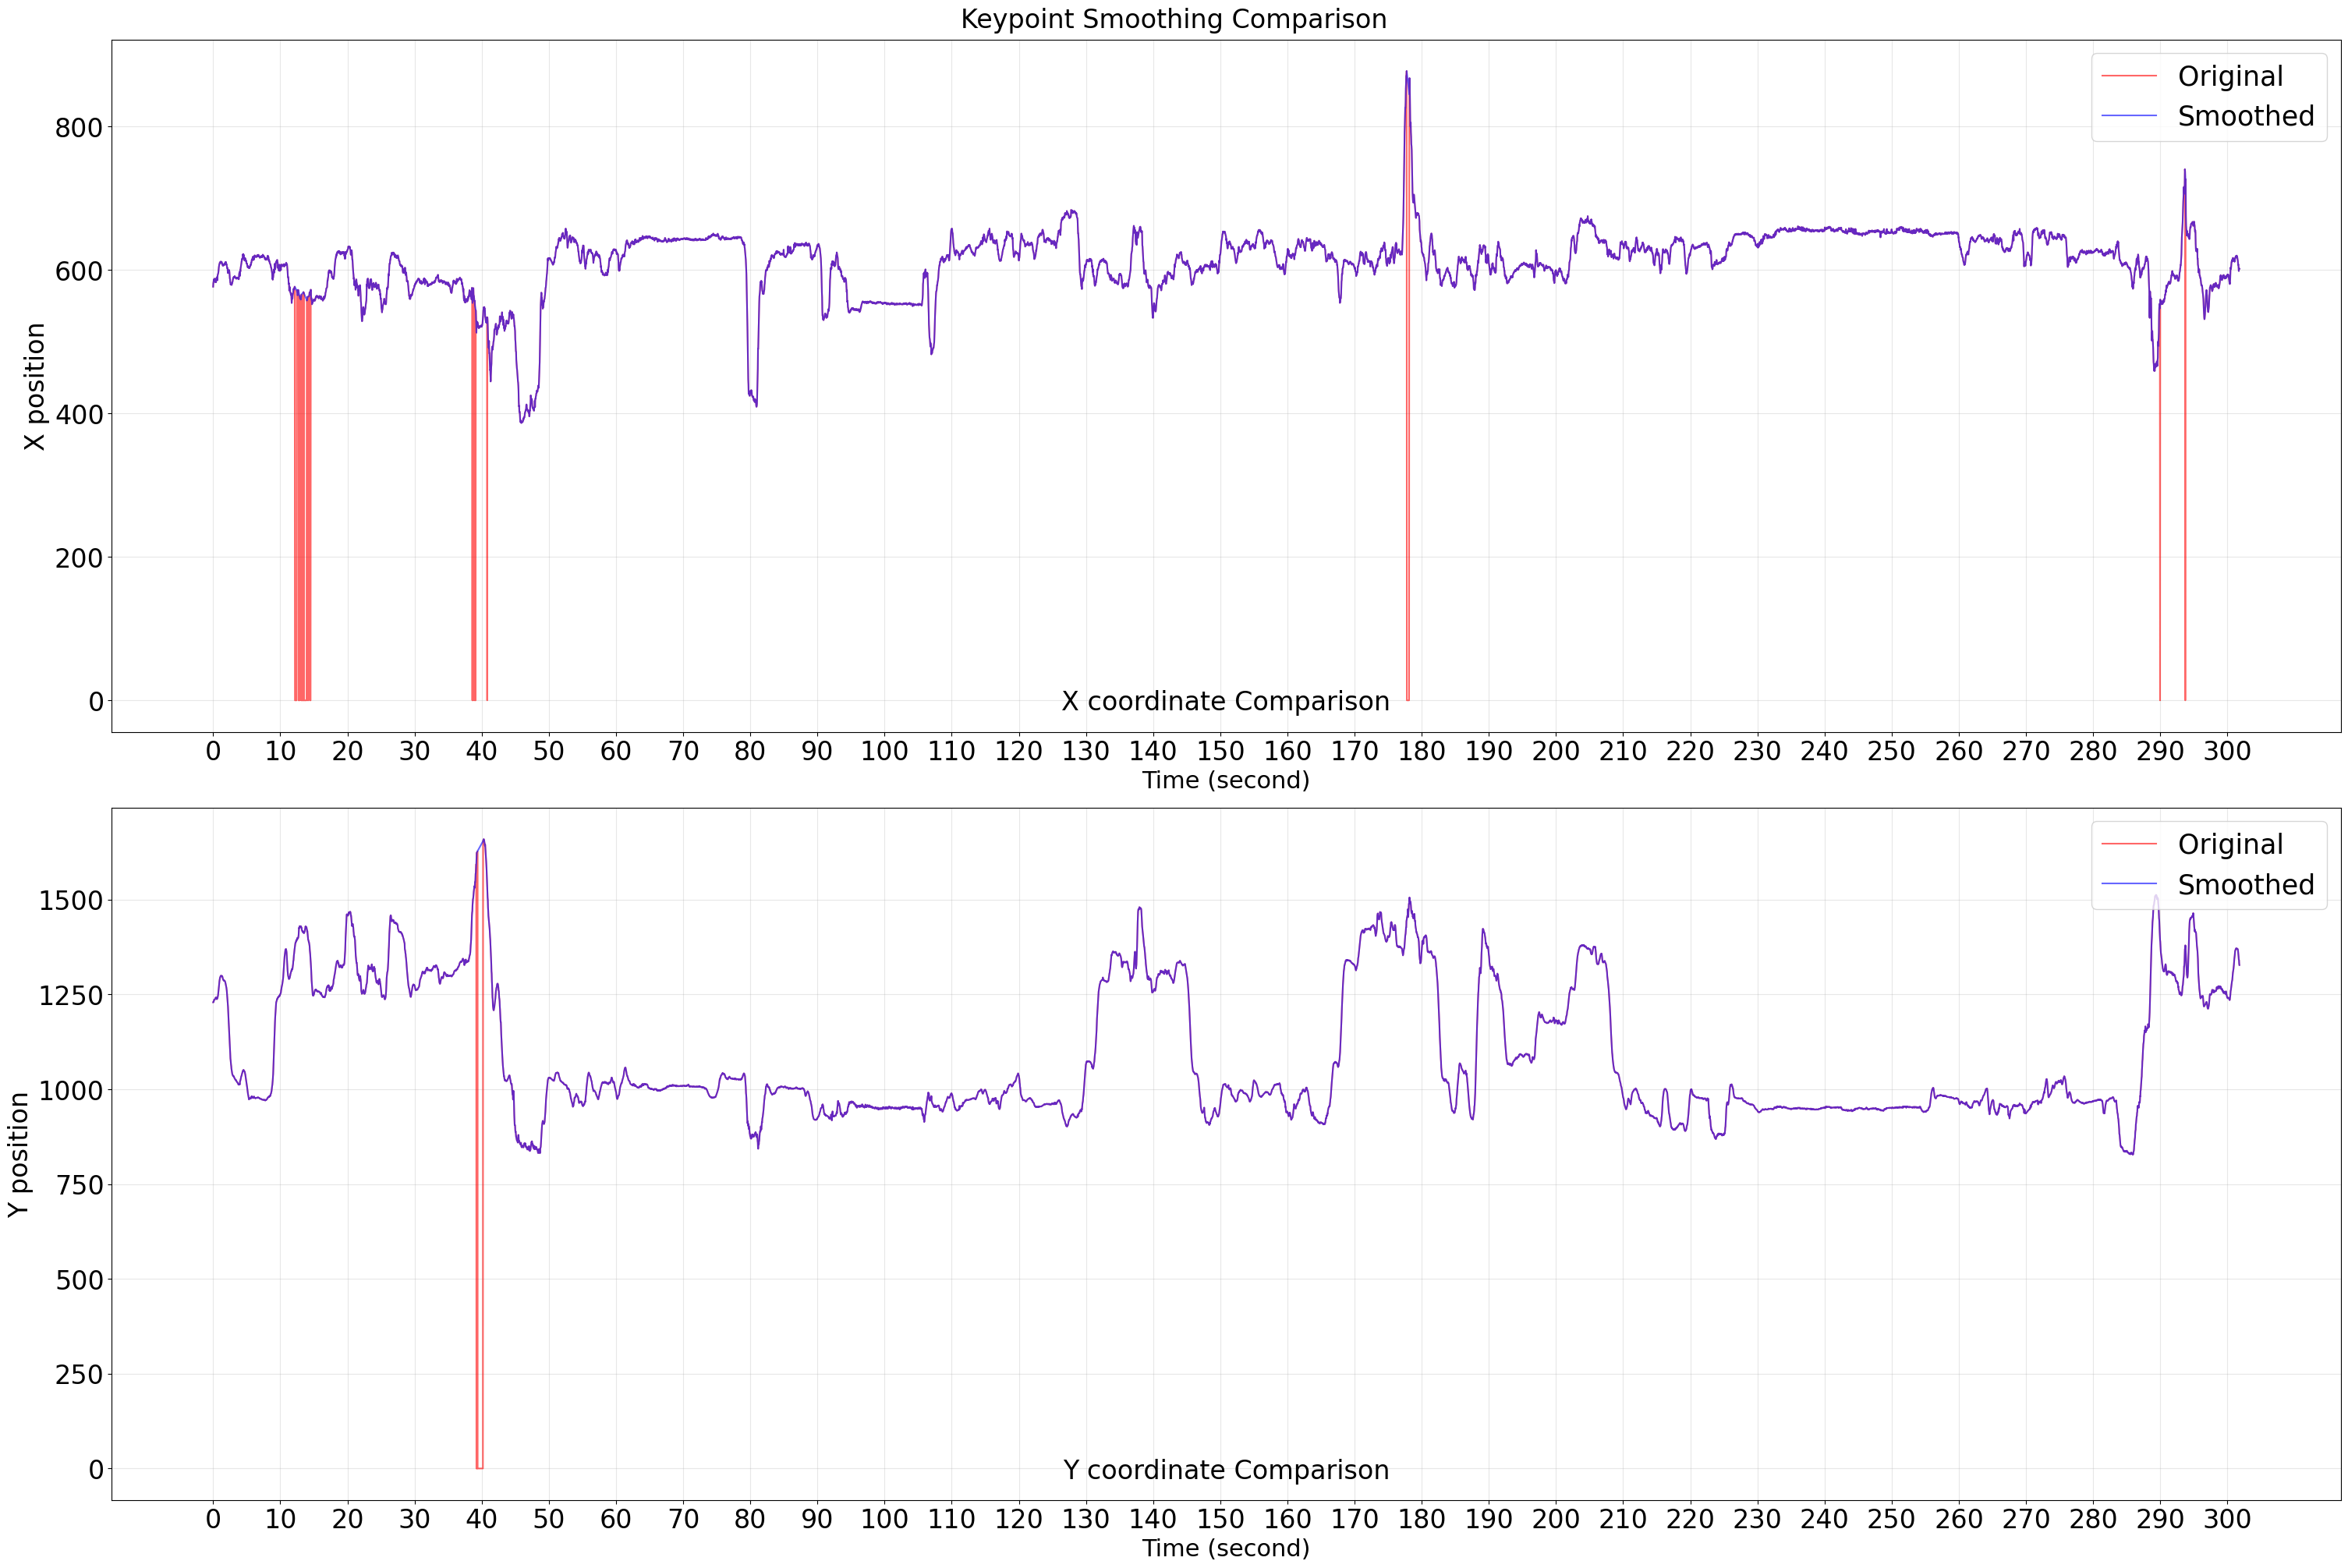


Smoothing Statistics:
Number of modified points in X coordinate: 68
Number of modified points in Y coordinate: 31
Max difference in X coordinate: 875.17
Max difference in Y coordinate: 1653.69


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# 从一个用户数据开始
USER_ID = "T1N01"  # 选择一个用户ID
keypoint_position = "left_elbow"  # 选择要观察的关键点

# 确保 KEYPOINTS_DICT 定义正确
KEYPOINTS_DICT = {
    "left_elbow": 8,  # 具体索引需要根据你的数据格式调整
    # ... 其他关键点的定义
}

# 读取该用户的数据
keypoint_csv = f"{DATA_FOLDER}/Body_KeyPoint_CSV/Front_{USER_ID}.csv"
kp_df_raw = pd.read_csv(keypoint_csv)
kp_df = kp_df_raw.loc[:, ~kp_df_raw.columns.str.contains('^Unnamed')]

def visualize_keypoint_smoothing_comparison(kp_df_orig, keypoint_position, USER_ID, FS=33, SMOOTH_LEN=3):
    """
    可视化关键点平滑前后的对比
    """
    # 复制原始数据，以免修改原始数据框
    kp_df = kp_df_orig.copy()

    # 获取特定关键点的列
    idx = int(KEYPOINTS_DICT[keypoint_position]*2)
    values_raw = np.array(kp_df)[:, idx:idx+2]

    # 创建平滑后的数据副本
    values_smoothed = values_raw.copy()
    values_smoothed[:, 0] = smooth_kp(values_smoothed[:, 0].copy())
    values_smoothed[:, 1] = smooth_kp(values_smoothed[:, 1].copy())

    # 创建2x1的子图布局
    fig, axs = plt.subplots(2, 1, figsize=(30, 20), layout="constrained")

    # 设置总标题
    fig.suptitle('Keypoint Smoothing Comparison', size=24)

    # 左上：绘制X坐标对比
    axs[0].plot(values_raw[:, 0], 'r', label='Original', alpha=0.6)
    axs[0].plot(values_smoothed[:, 0], 'b', label='Smoothed', alpha=0.6)
    axs[0].set_title('X coordinate Comparison', y=0, pad=20, fontsize=24)
    axs[0].tick_params(axis='both', which='major', labelsize=24)
    axs[0].set_xlabel("Time (second)", fontsize=22)
    axs[0].set_ylabel("X position", fontsize=24)
    axs[0].legend(fontsize=25, loc='upper right')  # 增大字体到32

    # 左下：绘制Y坐标对比
    axs[1].plot(values_raw[:, 1], 'r', label='Original', alpha=0.6)
    axs[1].plot(values_smoothed[:, 1], 'b', label='Smoothed', alpha=0.6)
    axs[1].set_title('Y coordinate Comparison', y=0, pad=20, fontsize=24)
    axs[1].tick_params(axis='both', which='major', labelsize=24)
    axs[1].set_xlabel("Time (second)", fontsize=22)
    axs[1].set_ylabel("Y position", fontsize=24)
    axs[1].legend(fontsize=25, loc='upper right')  # 增大字体到32

    # 设置时间轴刻度
    x_ticks = np.arange(0, len(values_raw), 10*FS)
    x_ticklabels = np.arange(0, len(x_ticks))*10

    # 为所有子图设置相同的x轴刻度并添加网格
    for ax in axs:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticklabels)
        ax.grid(True, alpha=0.3)

    plt.show()

    # 打印统计信息
    print("\nSmoothing Statistics:")
    x_diff = values_smoothed[:, 0] - values_raw[:, 0]
    y_diff = values_smoothed[:, 1] - values_raw[:, 1]
    print(f"Number of modified points in X coordinate: {np.sum(x_diff != 0)}")
    print(f"Number of modified points in Y coordinate: {np.sum(y_diff != 0)}")
    print(f"Max difference in X coordinate: {np.abs(x_diff).max():.2f}")
    print(f"Max difference in Y coordinate: {np.abs(y_diff).max():.2f}")

# 运行可视化
visualize_keypoint_smoothing_comparison(kp_df, keypoint_position, USER_ID)

In [ ]:
def segment(data, max_time, sub_window_size, stride_size):
    sub_windows = np.arange(sub_window_size)[None, :] + np.arange(0, max_time, stride_size)[:, None]

    row, col = np.where(sub_windows >= max_time)
    uniq_row = len(np.unique(row))

    if uniq_row > 0 and row[0] > 0:
        sub_windows = sub_windows[:-uniq_row, :]

    return data[sub_windows]

In [ ]:
import scipy

def extract_feature(data, fs):
    mean_ft = np.mean(data, axis=0)
    std_ft = np.std(data, axis=0)
    max_ft = np.max(data, axis=0)
    min_ft = np.min(data, axis=0)
    var_ft = np.var(data, axis=0)
    med_ft = np.median(data, axis=0)
    sum_ft = np.sum(data, axis=0)
    features = np.array([mean_ft, std_ft, max_ft, min_ft, var_ft, med_ft, sum_ft]).T.flatten()
    features = np.nan_to_num(features)
    return features

In [ ]:
WINDOW_SIZE = 2 # seconds
OVERLAP_RATE = 0.5 * WINDOW_SIZE # overlap 50% of window size

## Training data label mapping

In [ ]:
# Manually define action label encoding mapping
action_mapping = {
    "Explanation to patient": 0,
    "Confirm necessary items": 1,
    "Disinfect hands": 2,
    "Wearing gloves": 3,
    "Prepare the nutrition solution": 4,
    "Check the gastrostomy site": 5,
    "Open the gastrostomy cap": 6,
    "Inject lukewarm water": 7,
    "Connect the nutrition tube": 8,
    "Adjust the infusion rate": 9,
    "Removal of gloves": 10,
    "Prepare lukewarm water": 11,
    "Close the clamp": 12,
    "Disconnect the nutrition tube": 13,
    "Close the gastrostomy cap": 14,
    "Clean up used items": 15,
    "Others": 16
}

# Convert text labels in the `ann_df["annotation"]` column to encoded numeric labels
ann_df["activityID"] = ann_df["annotation"].map(action_mapping)

In [ ]:
# Processing training data
all_feature = []
all_label = []

for i in range(len(ann_df)):
    seg = kp_df.loc[int(ann_df['start_time'][i] * FS): int(ann_df['stop_time'][i] * FS)]
    seg_label = ann_df["activityID"].iloc[i]  # Using manually encoded labels
    if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
        # Segment keypoint data by WINDOW_SIZE and OVERLAP_RATE
        ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

        # Calculate features from each segment of keypoint data
        feature_seg = [extract_feature(ws_seg[i], FS) for i in range(len(ws_seg))]

        all_feature.extend(feature_seg)
        all_label.extend([seg_label] * len(ws_seg))  # Using manually encoded labels

In [ ]:
ann_df.head(5)

,start_time,stop_time,annotation,activityID
0,0,2.0,Others,16
1,2,9.0,Explanation to patient,0
2,9,19.0,Confirm necessary items,1
3,19,26.0,Disinfect hands,2
4,26,38.0,Wearing gloves,3


## Test data label mapping

In [ ]:
# Convert text labels in the `test_ann_df["annotation"]` column to encoded numeric labels
test_ann_df["activityID"] = test_ann_df["annotation"].map(action_mapping)

In [ ]:
# Processing test data with `annotation_encoded`
test_all_feature = []
test_all_label = []

for i in range(len(test_ann_df)):
    # Get the skeleton data corresponding to the start and end time of the current label
    seg = test_kp_df.loc[int(test_ann_df['start_time'][i] * FS): int(test_ann_df['stop_time'][i] * FS)]
    seg_label_encoded = test_ann_df["activityID"].iloc[i]  # Use the encoded tags

    if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
        # Segment the skeleton data by WINDOW_SIZE and OVERLAP_RATE
        ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

        # Extract features from each segment's skeleton data
        feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]

        # Add features and encoded labels to the test dataset
        test_all_feature.extend(feature_seg)
        test_all_label.extend([seg_label_encoded] * len(ws_seg))  # Use the encoded tags

In [ ]:
test_ann_df.head(5)

,start_time,stop_time,annotation,activityID
0,0,2.0,Others,16
1,2,10.0,Confirm necessary items,1
2,10,13.0,Others,16
3,13,16.0,Prepare the nutrition solution,4
4,16,21.0,Others,16


## Training : A set of data


In [ ]:
print("Total samples of training data: {}".format(len(all_feature)))
print("Total samples of testing data: {}".format(len(test_all_feature)))
print("Total features: {}".format(np.shape(all_feature)[1]))

Total samples of training data: 260
Total samples of testing data: 246
Total features: 245


### Choosing the best parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the random forest model
model_rf = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],       # Number
    'max_depth': [None, 10, 20, 30, 40, 50],          # Maximum depth
    'min_samples_split': [2, 5, 10, 15],              # Minimum number of samples required for internal node re-division
    'min_samples_leaf': [1, 2, 4, 6],                 # Minimum number of samples for leaf nodes
    'max_features': ['sqrt', 'log2', None],           # Number of features considered at each split
    'bootstrap': [True, False]                        # Whether to use sampling with replacement
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(all_feature, all_label)

# Output the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

"""
# Optimal parameters
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=False,
    n_jobs=-1
)
"""

model_rf = RandomForestClassifier(n_estimators=500,n_jobs=-1)


In [ ]:
model_rf.fit(all_feature, all_label)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

### Normalized confusion matrix

              precision    recall  f1-score   support

           0       0.44      0.95      0.60        44
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         5
           7       0.88      0.76      0.82        38
           8       0.00      0.00      0.00        13
           9       1.00      0.91      0.95        11
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         2
          13       1.00      0.25      0.40         8
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         8
          16       0.27      0.76      0.39        37

    accuracy                           0.45       246
   macro avg       0.22   

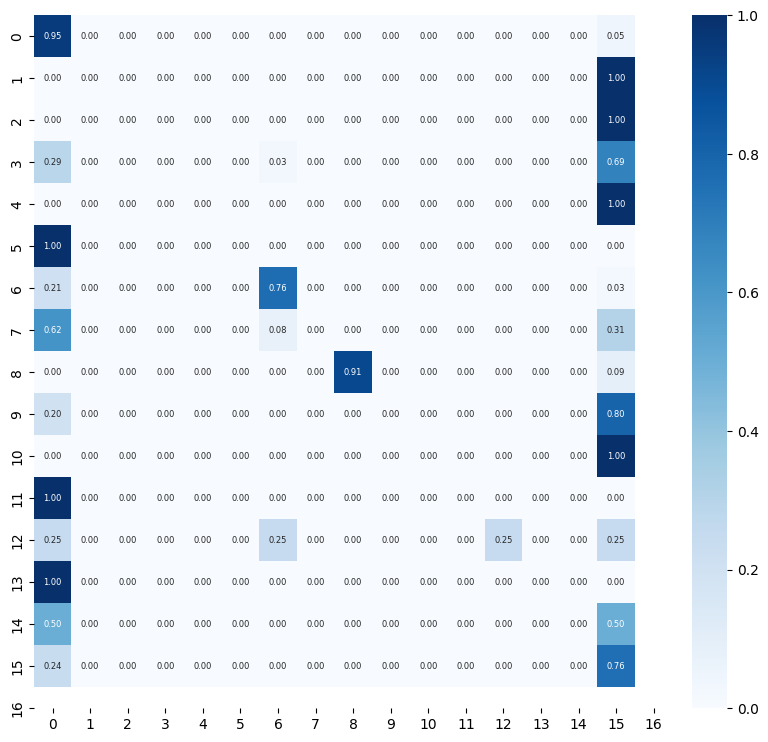

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

y_predict = model_rf.predict(test_all_feature)
print(classification_report(test_all_label, y_predict))
cm = confusion_matrix(test_all_label, y_predict, labels=np.unique(test_all_label))
cm_norm = cm / np.sum(cm, axis=1, keepdims=True)
plt.figure(figsize=(10, 9))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', annot_kws={"fontsize":6}, yticklabels=np.arange(TOTAL_CLASSESS), xticklabels=np.arange(TOTAL_CLASSESS))
plt.show()

## Ask Generative AI
1. Angle created by left elbow, left shoulder and left hip
2. Angle created by right elbow, right shoulder and right hip
3. Angle created by left wrist, left elbow and left shoulder
4. Angle created by right wrist, right elbow and right shoulder
5. Angle created by left elbow, left shoulder and right shoulder
6. Angle created by right elbow, right shoulder and left shoulder

In [ ]:
def cal_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return angle

def extract_joint_angles(kp_data, steps=2):
    # Angle formed by left elbow, left shoulder, and left hip
    left_elbow_shoulder_hip = np.asarray([
        cal_angle(
            kp_data[i, 8 * steps : (8 * steps + 2)],  # Left elbow
            kp_data[i, 6 * steps : (6 * steps + 2)],  # Left shoulder
            kp_data[i, 12 * steps : (12 * steps + 2)] # Left hip
        )
        for i in range(len(kp_data))
    ])
    left_elbow_shoulder_hip = np.nan_to_num(left_elbow_shoulder_hip)

    # Angle formed by right elbow, right shoulder, and right hip
    right_elbow_shoulder_hip = np.asarray([
        cal_angle(
            kp_data[i, 7 * steps : (7 * steps + 2)],  # Right elbow
            kp_data[i, 5 * steps : (5 * steps + 2)],  # Right shoulder
            kp_data[i, 11 * steps : (11 * steps + 2)] # Right hip
        )
        for i in range(len(kp_data))
    ])
    right_elbow_shoulder_hip = np.nan_to_num(right_elbow_shoulder_hip)

    # Angle formed by left wrist, left elbow, and left shoulder
    left_wrist_elbow_shoulder = np.asarray([
        cal_angle(
            kp_data[i, 10 * steps : (10 * steps + 2)], # Left wrist
            kp_data[i, 8 * steps : (8 * steps + 2)],   # Left elbow
            kp_data[i, 6 * steps : (6 * steps + 2)]    # Left shoulder
        )
        for i in range(len(kp_data))
    ])
    left_wrist_elbow_shoulder = np.nan_to_num(left_wrist_elbow_shoulder)

    # Angle formed by right wrist, right elbow, and right shoulder
    right_wrist_elbow_shoulder = np.asarray([
        cal_angle(
            kp_data[i, 9 * steps : (9 * steps + 2)],   # Right wrist
            kp_data[i, 7 * steps : (7 * steps + 2)],   # Right elbow
            kp_data[i, 5 * steps : (5 * steps + 2)]    # Right shoulder
        )
        for i in range(len(kp_data))
    ])
    right_wrist_elbow_shoulder = np.nan_to_num(right_wrist_elbow_shoulder)

    # Angle formed by left elbow, left shoulder, and right shoulder
    left_elbow_shoulder_right_shoulder = np.asarray([
        cal_angle(
            kp_data[i, 8 * steps : (8 * steps + 2)],   # Left elbow
            kp_data[i, 6 * steps : (6 * steps + 2)],   # Left shoulder
            kp_data[i, 5 * steps : (5 * steps + 2)]    # Right shoulder
        )
        for i in range(len(kp_data))
    ])
    left_elbow_shoulder_right_shoulder = np.nan_to_num(left_elbow_shoulder_right_shoulder)

    # Angle formed by right elbow, right shoulder, and left shoulder
    right_elbow_shoulder_left_shoulder = np.asarray([
        cal_angle(
            kp_data[i, 7 * steps : (7 * steps + 2)],   # Right elbow
            kp_data[i, 5 * steps : (5 * steps + 2)],   # Right shoulder
            kp_data[i, 6 * steps : (6 * steps + 2)]    # Left shoulder
        )
        for i in range(len(kp_data))
    ])
    right_elbow_shoulder_left_shoulder = np.nan_to_num(right_elbow_shoulder_left_shoulder)

    # Combine all angles into an array
    joint_angles = np.array([
        left_elbow_shoulder_hip,
        right_elbow_shoulder_hip,
        left_wrist_elbow_shoulder,
        right_wrist_elbow_shoulder,
        left_elbow_shoulder_right_shoulder,
        right_elbow_shoulder_left_shoulder
    ]).T

    return joint_angles

In [ ]:
def extract_velocity(kp_data):

# Calculate the position information difference between adjacent frames
    velocity = np.diff(kp_data, axis=0)
    return velocity

### Training data label mapping

In [ ]:
# Processing training data
all_feature = []
all_label = []

for i in range(len(ann_df)):
  seg = kp_df.loc[int(ann_df['start_time'][i]*FS): int(ann_df['stop_time'][i]*FS)]
  seg_label = ann_df["activityID"].iloc[i]
  if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
      # Calculate joint angles from keypoint data
      joint_angles = extract_joint_angles(np.array(seg))

      # Segment keypoint data and joint angles by WINDOW_SIZE and OVERLAP_RATE
      ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
      joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS,
                                        stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

      # Calculate velocity from each segment of keypoint data
      velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]

      # Calculate features from each segment of keypoint data, joint angles and velocity
      feature_seg = [extract_feature(ws_seg[i], FS) for i in range(len(ws_seg))]
      feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in
                                  range(len(joint_angles_seg))]
      feature_velocity_seg = [extract_feature(extract_velocity(ws_seg[i]), FS) for i in range(len(ws_seg))]

      # Concatenate all features
      feature_seg = np.concatenate([feature_seg, feature_joint_angles_seg, feature_velocity_seg], axis=1)

      all_feature.extend(feature_seg)
      all_label.extend([int(seg_label)]*len(ws_seg))

### Test data label mapping

In [ ]:
# Processing test data
test_all_feature = []
test_all_label = []

for i in range(len(test_ann_df)):
  seg = test_kp_df.loc[int(test_ann_df['start_time'][i]*FS): int(test_ann_df['stop_time'][i]*FS)]
  seg_label = test_ann_df["activityID"].iloc[i]
  if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
      # Calculate joint angles from keypoint data
      joint_angles = extract_joint_angles(np.array(seg))

      # Segment keypoint data and joint angles by WINDOW_SIZE and OVERLAP_RATE
      ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
      joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS,
                                        stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

      # Calculate velocity from each segment of keypoint data
      velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]

      # Calculate features from each segment of keypoint data, joint angles and velocity
      feature_seg = [extract_feature(ws_seg[i], FS) for i in range(len(ws_seg))]
      feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in
                                  range(len(joint_angles_seg))]
      feature_velocity_seg = [extract_feature(extract_velocity(ws_seg[i]), FS) for i in range(len(ws_seg))]

      # Concatenate all features
      feature_seg = np.concatenate([feature_seg, feature_joint_angles_seg, feature_velocity_seg], axis=1)

      test_all_feature.extend(feature_seg)
      test_all_label.extend([int(seg_label)]*len(ws_seg))

### Training data

In [ ]:
print("Total samples of training data: {}".format(len(all_feature)))
print("Total samples of testing data: {}".format(len(test_all_feature)))
print("Total features: {}".format(np.shape(test_all_feature)[1]))

Total samples of training data: 260
Total samples of testing data: 246
Total features: 406


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the random forest model
model_rf = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(all_feature, all_label)

# Output the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score:  0.6692307692307692


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use the best parameters found
model_rf = RandomForestClassifier(
    n_estimators=700,
    max_depth=10,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=2,
    bootstrap=False,
    n_jobs=-1
)

# model_rf = RandomForestClassifier(n_estimators=500,n_jobs=-1)

In [ ]:
model_rf.fit(all_feature, all_label)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=2, n_estimators=700, n_jobs=-1)

### Result

              precision    recall  f1-score   support

           0       0.34      0.93      0.50        44
           1       1.00      0.43      0.60         7
           2       1.00      0.15      0.27        13
           3       0.33      0.03      0.05        35
           4       1.00      0.22      0.36         9
           6       0.00      0.00      0.00         5
           7       0.79      0.39      0.53        38
           8       0.00      0.00      0.00        13
           9       1.00      0.73      0.84        11
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         2
          13       1.00      0.12      0.22         8
          14       0.00      0.00      0.00         5
          15       0.25      0.12      0.17         8
          16       0.31      0.70      0.43        37

    accuracy                           0.41       246
   macro avg       0.44   

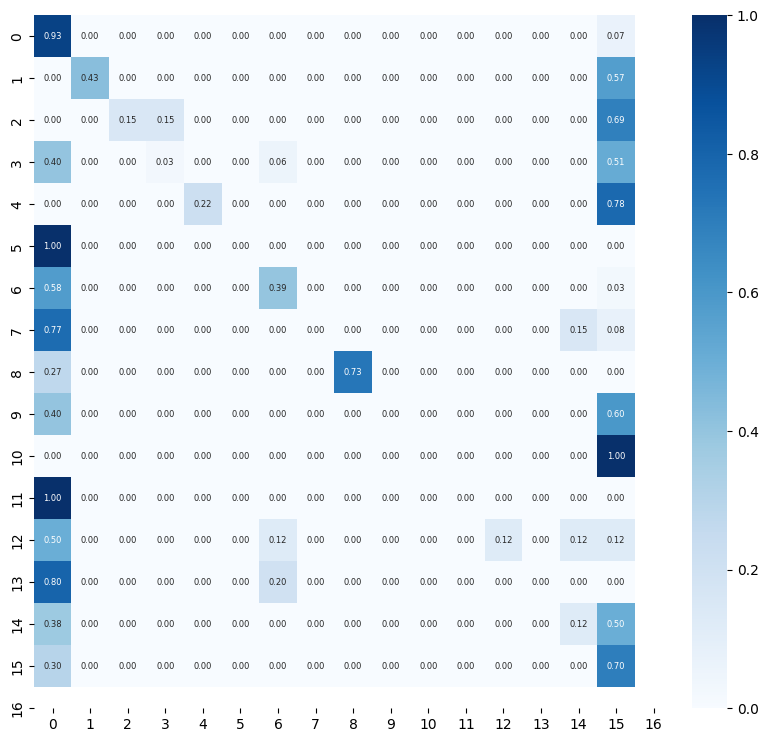

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

y_predict = model_rf.predict(test_all_feature)
print(classification_report(test_all_label, y_predict))
cm = confusion_matrix(test_all_label, y_predict, labels=np.unique(test_all_label))
cm_norm = cm / np.sum(cm, axis=1, keepdims=True)
plt.figure(figsize=(10, 9))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', annot_kws={"fontsize":6}, yticklabels=np.arange(TOTAL_CLASSESS), xticklabels=np.arange(TOTAL_CLASSESS))
plt.show()

# Processing Data : All data

## Building train data

In [3]:
import numpy as np
import pandas as pd

# Configuration and parameters
DATA_FOLDER = "/content/drive/MyDrive/Random/Hiroshima/ABC2025/Test"
USER_IDS = ["T1N01", "T1F01", "T1S01", "T1S02"]  # train data ID
FS = 33  # Sampling rate

# Action label encoding mapping
action_mapping = {
    "Explanation to patient": 0,
    "Confirm necessary items": 1,
    "Disinfect hands": 2,
    "Wearing gloves": 3,
    "Prepare the nutrition solution": 4,
    "Check the gastrostomy site": 5,
    "Open the gastrostomy cap": 6,
    "Inject lukewarm water": 7,
    "Connect the nutrition tube": 8,
    "Adjust the infusion rate": 9,
    "Removal of gloves": 10,
    "Prepare lukewarm water": 11,
    "Close the clamp": 12,
    "Disconnect the nutrition tube": 13,
    "Close the gastrostomy cap": 14,
    "Clean up used items": 15,
    "Others": 16
}

# Create a list to store all user data
all_kp_data = []
all_ann_data = []

# Load and clean each user's data
for user_id in USER_IDS:
    keypoint_csv = f"{DATA_FOLDER}/Body_KeyPoint_CSV/Front_{user_id}.csv"
    ann_csv = f"{DATA_FOLDER}/Annotation_CSV/Front_{user_id}.csv"

    # Load data
    kp_df = pd.read_csv(keypoint_csv).loc[:, ~pd.read_csv(keypoint_csv).columns.str.contains('^Unnamed')]
    ann_df = pd.read_csv(ann_csv).loc[:, ~pd.read_csv(ann_csv).columns.str.contains('^Unnamed')]

    # Clean up redundant columns
    kp_df = kp_df.loc[:, ~kp_df.columns.str.contains('Frame|conf|left_knee|right_knee|left_ankle|right_ankle', regex=True)]

    # Store in a list
    all_kp_data.append(kp_df)
    all_ann_data.append(ann_df)

print("Loaded and cleaned data for all users.")

Loaded and cleaned data for all users.


In [4]:
SMOOTH_LEN = 3  # Smoothing length, in seconds

def smooth_kp(kp_col):
    zero_idx = np.flatnonzero(kp_col == 0)
    split_idx = np.split(zero_idx, np.flatnonzero(np.diff(zero_idx) > 1) + 1)
    for each_split_idx in split_idx:
        if len(each_split_idx) == 0 or each_split_idx[0] == 0 or each_split_idx[-1] == (len(kp_col) - 1) or len(each_split_idx) > SMOOTH_LEN * FS:
            continue
        xp = [each_split_idx[0] - 1, each_split_idx[-1] + 1]
        fp = kp_col[xp]
        interp_kp = np.interp(each_split_idx, xp, fp)
        kp_col[each_split_idx] = interp_kp
    return kp_col

# Smooth the data of each user
for kp_df in all_kp_data:
    for i in range(len(kp_df.columns)):
        kp_df.iloc[:, i] = smooth_kp(np.array(kp_df.iloc[:, i]))

print("Smoothed all keypoint data.")

Smoothed all keypoint data.


In [5]:
# Map activity names to `activityID`
for ann_df in all_ann_data:
    ann_df["activityID"] = ann_df["annotation"].map(action_mapping)

print("Mapped activity labels to activity IDs.")

Mapped activity labels to activity IDs.


In [6]:
WINDOW_SIZE = 2  # Window size in seconds
OVERLAP_RATE = 0.5 * WINDOW_SIZE  # Window overlap ratio

def segment(data, max_time, sub_window_size, stride_size):
    sub_windows = np.arange(sub_window_size)[None, :] + np.arange(0, max_time, stride_size)[:, None]
    row, col = np.where(sub_windows >= max_time)
    uniq_row = len(np.unique(row))
    if uniq_row > 0 and row[0] > 0:
        sub_windows = sub_windows[:-uniq_row, :]
    return data[sub_windows]

def extract_feature(data, fs):
    mean_ft = np.mean(data, axis=0)
    std_ft = np.std(data, axis=0)
    max_ft = np.max(data, axis=0)
    min_ft = np.min(data, axis=0)
    var_ft = np.var(data, axis=0)
    med_ft = np.median(data, axis=0)
    sum_ft = np.sum(data, axis=0)
    features = np.array([mean_ft, std_ft, max_ft, min_ft, var_ft, med_ft, sum_ft]).T.flatten()
    features = np.nan_to_num(features)
    return features

In [7]:
all_features = []
all_labels = []

for kp_df, ann_df in zip(all_kp_data, all_ann_data):
    for i in range(len(ann_df)):
        # Extract the skeleton point data of the current active segment
        seg = kp_df.loc[int(ann_df['start_time'][i] * FS): int(ann_df['stop_time'][i] * FS)]
        seg_label = ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Split skeleton point data
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Extract features
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            all_features.extend(feature_seg)
            all_labels.extend([seg_label] * len(ws_seg))

print("Extracted features and labels for all users.")

Extracted features and labels for all users.


In [8]:
import numpy as np

def cal_angle(a, b, c):
    # Calculate the angle formed by three points a, b, c
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return angle

def extract_joint_angles(kp_data, steps=2):
    # Calculate the six specified joint angles
    left_elbow_shoulder_hip = np.asarray([
        cal_angle(kp_data[i, 8 * steps:(8 * steps + 2)], kp_data[i, 6 * steps:(6 * steps + 2)], kp_data[i, 12 * steps:(12 * steps + 2)])
        for i in range(len(kp_data))
    ])

    right_elbow_shoulder_hip = np.asarray([
        cal_angle(kp_data[i, 7 * steps:(7 * steps + 2)], kp_data[i, 5 * steps:(5 * steps + 2)], kp_data[i, 11 * steps:(11 * steps + 2)])
        for i in range(len(kp_data))
    ])

    left_wrist_elbow_shoulder = np.asarray([
        cal_angle(kp_data[i, 10 * steps:(10 * steps + 2)], kp_data[i, 8 * steps:(8 * steps + 2)], kp_data[i, 6 * steps:(6 * steps + 2)])
        for i in range(len(kp_data))
    ])

    right_wrist_elbow_shoulder = np.asarray([
        cal_angle(kp_data[i, 9 * steps:(9 * steps + 2)], kp_data[i, 7 * steps:(7 * steps + 2)], kp_data[i, 5 * steps:(5 * steps + 2)])
        for i in range(len(kp_data))
    ])

    left_elbow_shoulder_right_shoulder = np.asarray([
        cal_angle(kp_data[i, 8 * steps:(8 * steps + 2)], kp_data[i, 6 * steps:(6 * steps + 2)], kp_data[i, 5 * steps:(5 * steps + 2)])
        for i in range(len(kp_data))
    ])

    right_elbow_shoulder_left_shoulder = np.asarray([
        cal_angle(kp_data[i, 7 * steps:(7 * steps + 2)], kp_data[i, 5 * steps:(5 * steps + 2)], kp_data[i, 6 * steps:(6 * steps + 2)])
        for i in range(len(kp_data))
    ])

    # Merge all joint angles
    joint_angles = np.array([
        left_elbow_shoulder_hip, right_elbow_shoulder_hip, left_wrist_elbow_shoulder,
        right_wrist_elbow_shoulder, left_elbow_shoulder_right_shoulder, right_elbow_shoulder_left_shoulder
    ]).T
    return joint_angles

def extract_velocity(kp_data):
    # Calculate the coordinate difference between adjacent frames to obtain the velocity feature
    velocity = np.diff(kp_data, axis=0)
    return velocity

In [9]:
all_features = []
all_labels = []

for kp_df, ann_df in zip(all_kp_data, all_ann_data):
    for i in range(len(ann_df)):
        # Extract the skeleton point data of the current active segment
        seg = kp_df.loc[int(ann_df['start_time'][i] * FS): int(ann_df['stop_time'][i] * FS)]
        seg_label = ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Joint angles
            joint_angles = extract_joint_angles(np.array(seg))

            # Split skeleton point data and joint angle data
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Calculate the speed characteristics of each segment
            velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]

            # Extract skeleton features, angle features and speed features of each segment
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in range(len(joint_angles_seg))]
            feature_velocity_seg = [extract_feature(velocity_seg[i], FS) for i in range(len(velocity_seg))]

            # Merge all features
            feature_seg_combined = [np.concatenate([feature_seg[j], feature_joint_angles_seg[j], feature_velocity_seg[j]]) for j in range(len(ws_seg))]

            # Add features and labels to the training dataset
            all_features.extend(feature_seg_combined)
            all_labels.extend([seg_label] * len(ws_seg))

print("Extracted features and labels for all users.")

Extracted features and labels for all users.


In [10]:
all_features = np.array(all_features)
all_labels = np.array(all_labels)

print("Total training samples:", len(all_features))
print("Total training labels:", len(all_labels))
print("Feature shape:", all_features.shape)

Total training samples: 1069
Total training labels: 1069
Feature shape: (1069, 406)


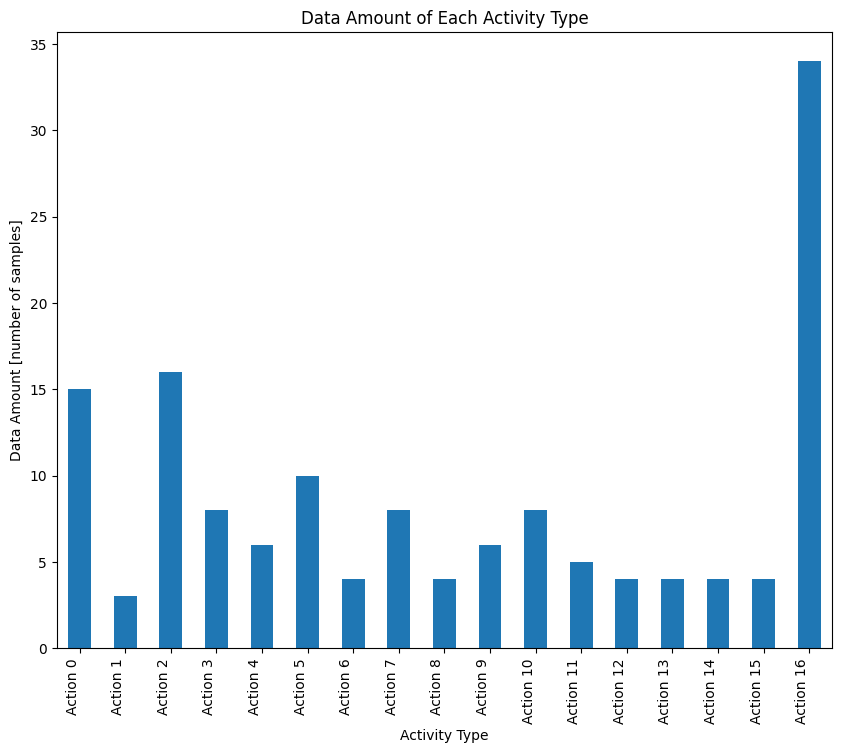

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge all users' `activityID` columns into one list
all_activity_ids = []

for ann_df in all_ann_data:
    all_activity_ids.extend(ann_df["activityID"])

# Convert all active tag IDs to Pandas Series for statistics
activity_series = pd.Series(all_activity_ids, name="activityID")

# Calculate the frequency of each active tag and generate a statistical table
activity_count = activity_series.value_counts().sort_index()
activity_count.index = [f"Action {i}" for i in activity_count.index]  # 为每个标签增加描述

# Draw a bar chart
plt.figure(figsize=(10, 8))
activity_count.plot(kind='bar')
plt.title('Data Amount of Each Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Data Amount [number of samples]')
plt.xticks(rotation=90, ha="right")
plt.show()

## Building test data

In [12]:
import numpy as np
import pandas as pd

# Configuration and parameters
DATA_FOLDER = "/content/drive/MyDrive/Random/Hiroshima/ABC2025/Test"
TEST_IDS = ["T1N02", "T1F02"]  # Test data ID
FS = 33  # Sampling rate

# Action label encoding mapping
action_mapping = {
    "Explanation to patient": 0,
    "Confirm necessary items": 1,
    "Disinfect hands": 2,
    "Wearing gloves": 3,
    "Prepare the nutrition solution": 4,
    "Check the gastrostomy site": 5,
    "Open the gastrostomy cap": 6,
    "Inject lukewarm water": 7,
    "Connect the nutrition tube": 8,
    "Adjust the infusion rate": 9,
    "Removal of gloves": 10,
    "Prepare lukewarm water": 11,
    "Close the clamp": 12,
    "Disconnect the nutrition tube": 13,
    "Close the gastrostomy cap": 14,
    "Clean up used items": 15,
    "Others": 16
}

# Create a list to store all test user data
test_all_kp_data = []
test_all_ann_data = []

# Load and clean the data for each test user
for user_id in TEST_IDS:
    keypoint_csv = f"{DATA_FOLDER}/Body_KeyPoint_CSV/Front_{user_id}.csv"
    ann_csv = f"{DATA_FOLDER}/Annotation_CSV/Front_{user_id}.csv"

    # Load data
    kp_df = pd.read_csv(keypoint_csv).loc[:, ~pd.read_csv(keypoint_csv).columns.str.contains('^Unnamed')]
    ann_df = pd.read_csv(ann_csv).loc[:, ~pd.read_csv(ann_csv).columns.str.contains('^Unnamed')]

    # Clean up redundant columns
    kp_df = kp_df.loc[:, ~kp_df.columns.str.contains('Frame|conf|left_knee|right_knee|left_ankle|right_ankle', regex=True)]

    # Store the cleaned data in a list
    test_all_kp_data.append(kp_df)
    test_all_ann_data.append(ann_df)

print("Loaded and cleaned test data for all users.")

Loaded and cleaned test data for all users.


In [13]:
SMOOTH_LEN = 3  # Smoothing length, in seconds

def smooth_kp(kp_col):
    zero_idx = np.flatnonzero(kp_col == 0)
    split_idx = np.split(zero_idx, np.flatnonzero(np.diff(zero_idx) > 1) + 1)
    for each_split_idx in split_idx:
        if len(each_split_idx) == 0 or each_split_idx[0] == 0 or each_split_idx[-1] == (len(kp_col) - 1) or len(each_split_idx) > SMOOTH_LEN * FS:
            continue
        xp = [each_split_idx[0] - 1, each_split_idx[-1] + 1]
        fp = kp_col[xp]
        interp_kp = np.interp(each_split_idx, xp, fp)
        kp_col[each_split_idx] = interp_kp
    return kp_col

# Smooth the data of each test user
for test_kp_df in test_all_kp_data:
    for i in range(len(test_kp_df.columns)):
        test_kp_df.iloc[:, i] = smooth_kp(np.array(test_kp_df.iloc[:, i]))

print("Smoothed all test keypoint data.")

Smoothed all test keypoint data.


In [14]:
# Map activity names in test data to `activityID`
for test_ann_df in test_all_ann_data:
    test_ann_df["activityID"] = test_ann_df["annotation"].map(action_mapping)

print("Mapped test activity labels to activity IDs.")

Mapped test activity labels to activity IDs.


In [15]:
test_all_features = []
test_all_labels = []

for test_kp_df, test_ann_df in zip(test_all_kp_data, test_all_ann_data):
    for i in range(len(test_ann_df)):
        # Extract the skeleton point data of the current active segment
        seg = test_kp_df.loc[int(test_ann_df['start_time'][i] * FS): int(test_ann_df['stop_time'][i] * FS)]
        seg_label = test_ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Split skeleton point data
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Extract features for each segment
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]

            # Add features and labels to the test data
            test_all_features.extend(feature_seg)
            test_all_labels.extend([seg_label] * len(ws_seg))

print("Extracted features and labels for all test users.")

Extracted features and labels for all test users.


In [17]:
for test_kp_df in test_all_kp_data:
    # Calculate joint angles
    joint_angles = extract_joint_angles(np.array(test_kp_df))

    # Calculate speed characteristics
    velocity = extract_velocity(np.array(test_kp_df))

In [18]:
test_all_features = []
test_all_labels = []

for test_kp_df, test_ann_df in zip(test_all_kp_data, test_all_ann_data):
    for i in range(len(test_ann_df)):
        # Extract the skeleton point data of the current active segment
        seg = test_kp_df.loc[int(test_ann_df['start_time'][i] * FS): int(test_ann_df['stop_time'][i] * FS)]
        seg_label = test_ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Calculate joint angles
            joint_angles = extract_joint_angles(np.array(seg))

            # Split skeleton point data and joint angle data
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Calculate the speed characteristics of each segment
            velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]

            # Extract skeleton features, angle features and speed features of each segment
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in range(len(joint_angles_seg))]
            feature_velocity_seg = [extract_feature(velocity_seg[i], FS) for i in range(len(velocity_seg))]

            # Merge all features
            feature_seg_combined = [np.concatenate([feature_seg[j], feature_joint_angles_seg[j], feature_velocity_seg[j]]) for j in range(len(ws_seg))]

            # Add features and labels to the final test dataset
            test_all_features.extend(feature_seg_combined)
            test_all_labels.extend([seg_label] * len(ws_seg))

print("Extracted features and labels for all test users.")

Extracted features and labels for all test users.


In [19]:
test_all_features = np.array(test_all_features)
test_all_labels = np.array(test_all_labels)

print("Total testing samples:", len(test_all_features))
print("Total testing labels:", len(test_all_labels))
print("Feature shape:", test_all_features.shape)

Total testing samples: 526
Total testing labels: 526
Feature shape: (526, 406)


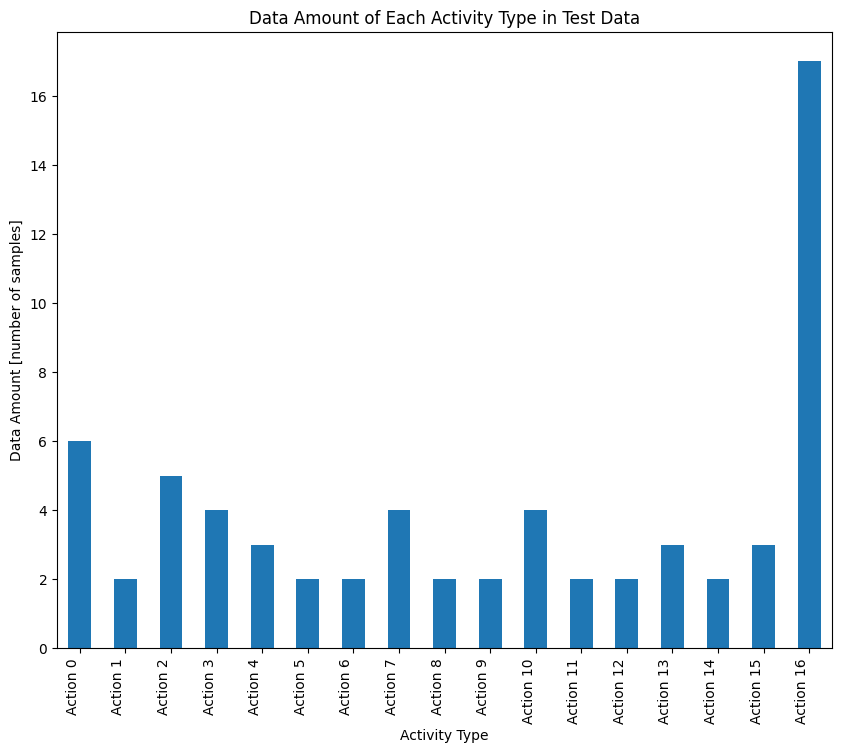

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine all test users' `activityID` columns into one list
test_all_activity_ids = []

for test_ann_df in test_all_ann_data:
    test_all_activity_ids.extend(test_ann_df["activityID"])

# Convert all active tag IDs to Pandas Series for statistics
test_activity_series = pd.Series(test_all_activity_ids, name="activityID")

# Calculate the frequency of each active tag and generate a statistical table
test_activity_count = test_activity_series.value_counts().sort_index()
test_activity_count.index = [f"Action {i}" for i in test_activity_count.index]  # 为每个标签增加描述

# Draw a bar chart
plt.figure(figsize=(10, 8))
test_activity_count.plot(kind='bar')
plt.title('Data Amount of Each Activity Type in Test Data')
plt.xlabel('Activity Type')
plt.ylabel('Data Amount [number of samples]')
plt.xticks(rotation=90, ha="right")
plt.show()

In [21]:
print("Total samples of training data: {}".format(len(all_features)))
print("Total samples of testing data: {}".format(len(test_all_features)))
print("Total features: {}".format(np.shape(test_all_features)[1]))

Total samples of training data: 1069
Total samples of testing data: 526
Total features: 406


## Use SMOTE

In [22]:
!pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [24]:
# Apply SMOTE to the training data
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(all_features, all_labels)

## Building model

In [ ]:
# Define the random forest model
model_rf = RandomForestClassifier()

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:  0.9499063013807174


In [ ]:
# Create a model using the best parameters
model_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    max_features=grid_search.best_params_['max_features'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    bootstrap=grid_search.best_params_['bootstrap'],
    n_jobs=-1
)

# Model training
model_rf.fit(all_features, all_labels)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=300,
                       n_jobs=-1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a model using the specified parameters
model_rf = RandomForestClassifier(
    bootstrap=False,          # False
    max_depth=None,          # None表示树可以生长到最大深度
    max_features='log2',     # 每次分裂时考虑的特征数是log2(n_features)
    min_samples_leaf=1,      # 叶节点的最小样本数
    min_samples_split=2,     # 分裂一个内部节点所需的最小样本数
    n_estimators=300,        # 树的数量
    n_jobs=-1               # 使用所有可用的CPU核心
)

# Model training
model_rf.fit(all_features, all_labels)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=300,
                       n_jobs=-1)

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(
    bootstrap=False,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300,
    n_jobs=-1,
    random_state=42
)
model_rf.fit(X_train_resampled, y_train_resampled)
print("Model training completed!")

Model training completed!


## Result

In [26]:
# Get the total number of categories
TOTAL_CLASSESS = len(action_mapping)

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.43      0.44        51
           1       0.85      0.63      0.72        35
           2       0.36      0.53      0.43        17
           3       0.88      0.48      0.62        63
           4       0.52      0.83      0.64        18
           5       0.37      0.52      0.43        21
           6       0.00      0.00      0.00         9
           7       0.62      0.90      0.73        89
           8       0.64      0.30      0.41        30
           9       0.92      0.97      0.94        34
          10       0.00      0.00      0.00        10
          11       0.50      0.83      0.62        12
          12       0.00      0.00      0.00         4
          13       0.44      0.41      0.42        17
          14       0.00      0.00      0.00        10
          15       0.28      0.37      0.32        19
          16       0.43      0.41      0.42        87

   

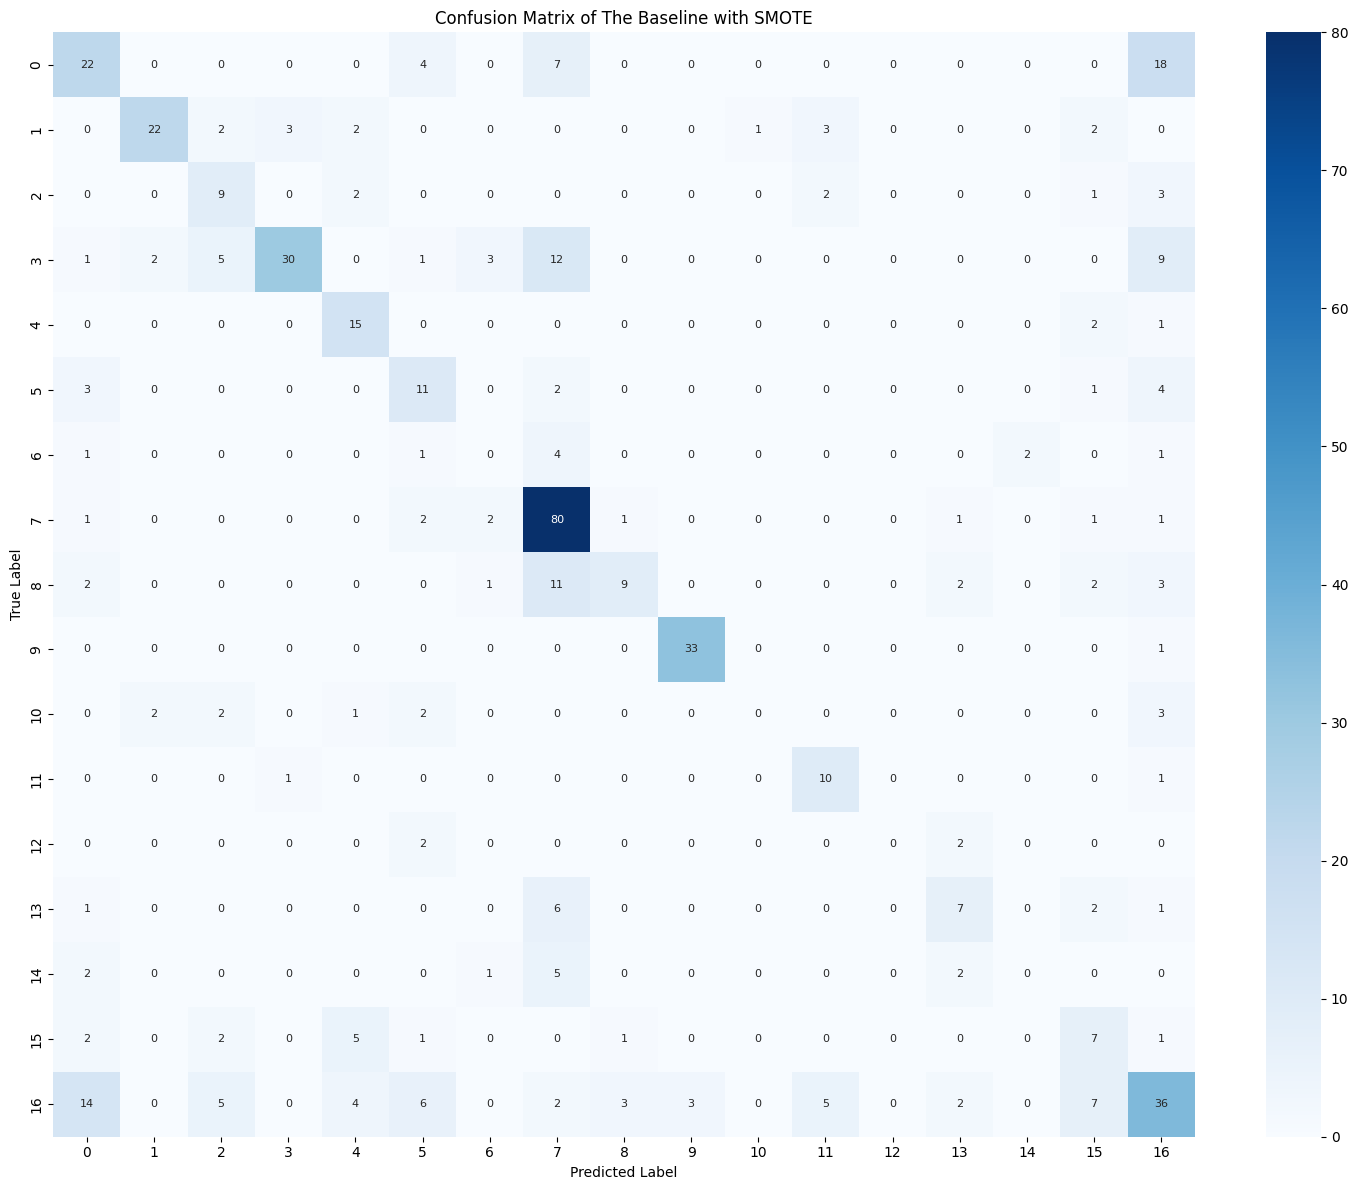

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 使用模型预测测试数据的标签
y_predict = model_rf.predict(test_all_features)

# 输出分类报告
print("Classification Report:")
print(classification_report(test_all_labels, y_predict))

# 计算混淆矩阵
cm = confusion_matrix(test_all_labels, y_predict, labels=np.arange(17))

# 创建更大的图表
plt.figure(figsize=(15, 12))

# 绘制热力图
sns.heatmap(cm,
            annot=True,  # 显示数值
            fmt='d',     # 使用整数格式
            cmap='Blues',
            annot_kws={"size": 8},  # 设置注释字体大小
            xticklabels=np.arange(17),  # 使用0-16的标签
            yticklabels=np.arange(17))

# 设置标题和标签
plt.title("Confusion Matrix of The Baseline with SMOTE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

              precision    recall  f1-score   support

           0       0.46      0.37      0.41        51
           1       1.00      0.60      0.75        35
           2       0.32      0.47      0.38        17
           3       0.80      0.44      0.57        63
           4       0.52      0.78      0.62        18
           5       0.30      0.48      0.37        21
           6       0.00      0.00      0.00         9
           7       0.62      0.94      0.75        89
           8       0.70      0.23      0.35        30
           9       0.89      0.91      0.90        34
          10       0.00      0.00      0.00        10
          11       0.53      0.75      0.62        12
          12       0.00      0.00      0.00         4
          13       0.46      0.35      0.40        17
          14       0.00      0.00      0.00        10
          15       0.33      0.32      0.32        19
          16       0.33      0.44      0.38        87

    accuracy              

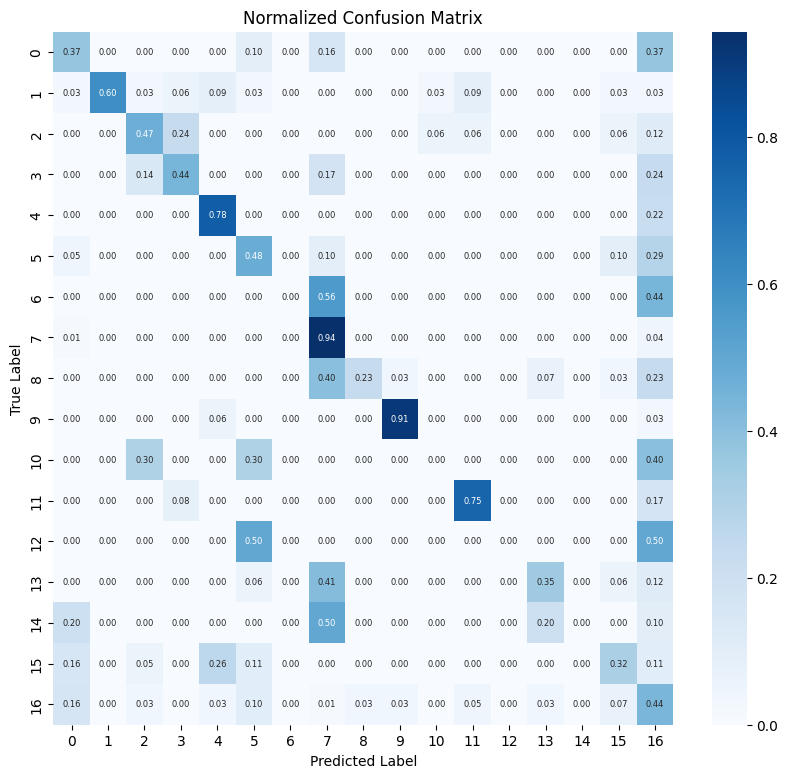

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use the model to predict the labels of the test data
y_predict = model_rf.predict(test_all_features)

# Output classification report
print(classification_report(test_all_labels, y_predict))

# Calculate the confusion matrix
cm = confusion_matrix(test_all_labels, y_predict, labels=np.unique(test_all_labels))

# Normalize the confusion matrix
cm_norm = cm / np.sum(cm, axis=1, keepdims=True)

# Draw a heatmap of the normalized confusion matrix
plt.figure(figsize=(10, 9))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', annot_kws={"fontsize":6}, yticklabels=np.arange(TOTAL_CLASSESS), xticklabels=np.arange(TOTAL_CLASSESS))
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.37      0.40        51
           1       1.00      0.60      0.75        35
           2       0.36      0.53      0.43        17
           3       0.83      0.46      0.59        63
           4       0.56      0.83      0.67        18
           5       0.26      0.48      0.34        21
           6       0.00      0.00      0.00         9
           7       0.60      0.93      0.73        89
           8       0.78      0.23      0.36        30
           9       0.89      0.94      0.91        34
          10       0.00      0.00      0.00        10
          11       0.56      0.83      0.67        12
          12       0.00      0.00      0.00         4
          13       0.29      0.12      0.17        17
          14       0.00      0.00      0.00        10
          15       0.37      0.37      0.37        19
          16       0.40      0.48      0.44        87

   

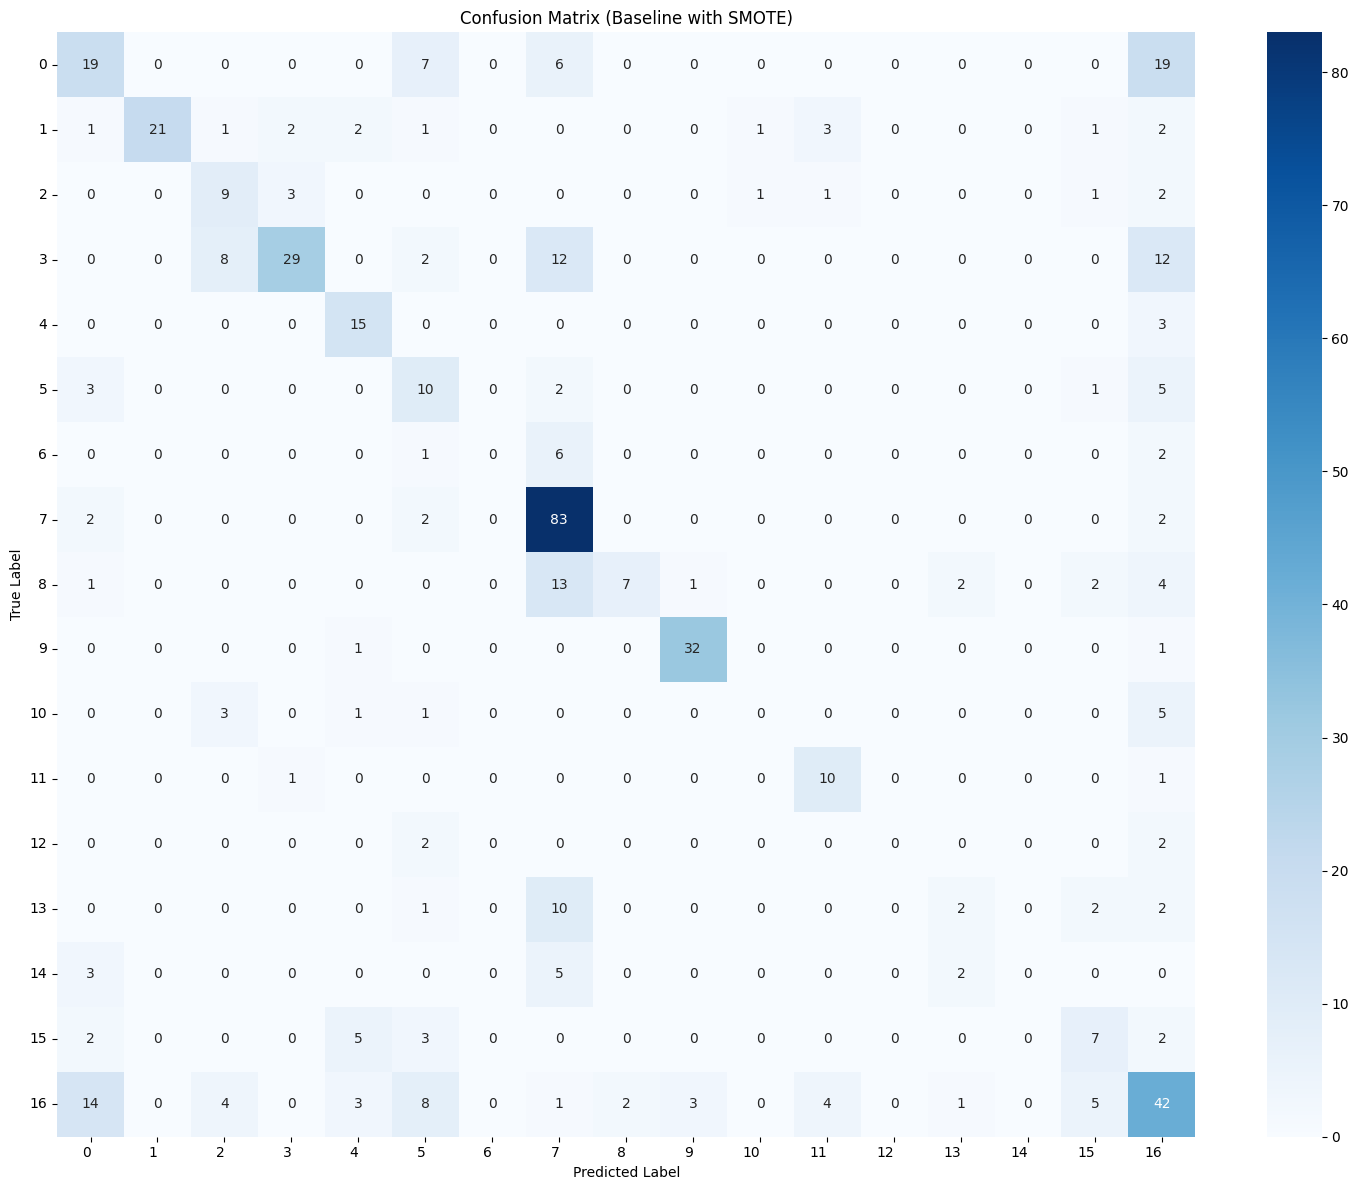

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 预测测试数据
y_predict = model_rf.predict(test_all_features)

# 输出分类报告
print("Classification Report:")
print(classification_report(test_all_labels, y_predict))

# 计算混淆矩阵（使用原始计数）
cm = confusion_matrix(test_all_labels, y_predict, labels=np.arange(17))  # 0-16的标签

# 创建0-16的标签列表
label_names = [str(i) for i in range(17)]

plt.figure(figsize=(15, 12))  # 增大图像尺寸以便更好地显示标签

# 使用原始计数的热力图
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names,
            yticklabels=label_names)

plt.title("Confusion Matrix (Baseline with SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 调整标签显示
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Store results for each test user
test_results = {}

# Loop through each test user and calculate accuracy and F1 score
for test_user_id, test_kp_df, test_ann_df in zip(TEST_IDS, test_all_kp_data, test_all_ann_data):
    test_features = []
    test_labels = []

    for i in range(len(test_ann_df)):
        # Get data for the current activity segment
        seg = test_kp_df.loc[int(test_ann_df['start_time'][i] * FS): int(test_ann_df['stop_time'][i] * FS)]
        seg_label = test_ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Calculate angles and velocities
            joint_angles = extract_joint_angles(np.array(seg))
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]

            # Extract features for each segment
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in range(len(joint_angles_seg))]
            feature_velocity_seg = [extract_feature(velocity_seg[i], FS) for i in range(len(velocity_seg))]

            # Ensure features have consistent lengths
            min_len = min(len(feature_seg), len(feature_joint_angles_seg), len(feature_velocity_seg))

            # Combine all features (without distance features)
            feature_seg_combined = [
                np.concatenate([feature_seg[j], feature_joint_angles_seg[j], feature_velocity_seg[j]])
                for j in range(min_len)
            ]

            # Add features and labels for the current user
            test_features.extend(feature_seg_combined)
            test_labels.extend([seg_label] * min_len)

    # Convert to arrays for prediction
    test_features = np.array(test_features)
    test_labels = np.array(test_labels)

    # Predict and evaluate for the current user
    y_pred = model_rf.predict(test_features)
    acc = accuracy_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred, average="weighted")

    # Store results
    test_results[test_user_id] = {"Accuracy": acc, "F1-score": f1}

# Create and format results table
results_df = pd.DataFrame(test_results).T
results_df.index.name = 'File'
results_df.loc['TOTAL'] = results_df.mean()
results_df = results_df.round(2)

# Display results with bold headers and TOTAL row
print(f"\033[1m{'File':<8}   {'Accuracy':<10}   {'F1-score':<10}\033[0m")
print(" ")
for idx, row in results_df.iterrows():
    if idx == 'TOTAL':
        print(" ")
        print(f"\033[1m{idx:<8}   {row['Accuracy']:<10.2f}   {row['F1-score']:<10.2f}\033[0m")
    else:
        print(f"{idx:<8}   {row['Accuracy']:<10.2f}   {row['F1-score']:<10.2f}")
print(" ")

File       Accuracy     F1-score  
 
T1N02      0.44         0.41      
T1F02      0.61         0.60      
 
TOTAL      0.53         0.50      
 


# Try adding more features with LLM
**Input Prompt:**

Your role: You are a researcher in the human activity recognition area.
Problem you need to solve: Create a machine learning model for nursing activity recognition. Recognize current human activity from video recorded nurse performing Gastrostomy Tube Feeding, and output the activity type. The input is pose skeleton extracted from the video. The output is activity label name.

Output activity labels:

*   "Explanation to patient": 0,
*   "Confirm necessary items": 1,
*   "Disinfect hands": 2,
*   "Wearing gloves": 3,
*   "Prepare the nutrition solution": 4,
*   "Check the gastrostomy site": 5,
*   "Open the gastrostomy cap": 6,
*   "Inject lukewarm water": 7,
*   "Connect the nutrition tube": 8,
*   "Adjust the infusion rate": 9,
*   "Removal of gloves": 10,
*   "Prepare lukewarm water": 11,
*   "Close the clamp": 12,
*   "Disconnect the nutrition tube": 13,
*   "Close the gastrostomy cap": 14,
*   "Clean up used items": 15,
*   "Others": 16

Currently, we have calculated the following features from the pose skeleton data:

1.   Statistical Features: Mean, standard deviation, minimum, maximum, variance, median, and sum.

2.   Angle Features:Angle formed by the left elbow, left shoulder, and left hip;Angle formed by the right elbow, right shoulder, and right hip;Angle formed by the left wrist, left elbow, and left shoulder;Angle formed by the right wrist, right elbow, and right shoulder;Angle formed by the left elbow, left shoulder, and right shoulder;Angle formed by the right elbow, right shoulder, and left shoulder.

3.   Velocity Features:The positional difference of each skeleton point between each frame and the previous frame, representing the movement speed of skeleton points over different time frames.

Your task: What other features should be calculated from pose skeleton to improve the model?

---

**Output from ChatGPT4o:**

To enhance your nursing activity recognition model using pose skeleton data, consider incorporating the following additional features:

- Relative Joint Distances:

Description: Compute Euclidean distances between key pairs of joints, such as hands to head, hands to torso, or elbows to hips.

Benefit: Captures spatial relationships crucial for distinguishing activities involving reaching, bending, or interacting with specific body parts.

- Acceleration Features:

Description: Calculate the second derivative of joint positions to obtain joint accelerations.

Benefit: Identifies sudden changes in movement speed, aiding in recognizing activities with abrupt motions like "Disinfect hands" vs. smoother actions.

- Angular Velocity and Acceleration:

Description: Determine the rate of change of joint angles (angular velocity) and the rate of change of angular velocity (angular acceleration).

Benefit: Differentiates activities based on rotational movements, such as twisting or turning motions during "Adjust the infusion rate."

- Trajectory Features:

Description: Analyze the paths traced by joints over time, focusing on key joints like wrists or elbows.

Benefit: Captures movement patterns specific to certain tasks, such as the circular motion of "Prepare the nutrition solution."

- Temporal Dynamics:

Description: Include features like the duration of specific poses, time between movements, and sequential patterns.

Benefit: Helps in recognizing activities that have characteristic timing, such as the pause during "Explain to patient."

- Symmetry Features:

Description: Calculate differences or ratios between the movements of left and right body parts.

Benefit: Identifies asymmetrical actions, useful for activities like "Wearing gloves," which may involve one hand more than the other.

- Pose Similarity Scores:

Description: Define reference poses for each activity and compute similarity metrics (e.g., cosine similarity) between current poses and reference poses.

Benefit: Enhances recognition of activities with distinctive postures, like "Check the gastrostomy site."

- Motion Direction Features:

Description: Determine the direction vectors of joint movements between frames.

Benefit: Distinguishes activities based on movement direction, such as upward vs. downward motions in "Inject lukewarm water."

- Frequency Domain Features:

Description: Apply Fourier Transform to joint trajectories to extract frequency components.

Benefit: Identifies repetitive motions, beneficial for recognizing rhythmic activities like "Adjust the infusion rate."

- Posture Clusters:

Description: Use clustering algorithms (e.g., K-means) to group similar poses and assign cluster labels as features.

Benefit: Simplifies complex pose data into manageable categories, aiding in activity differentiation.

- Joint Jerk Features:

Description: Compute the third derivative of joint positions to measure jerk (rate of change of acceleration).

Benefit: Detects abrupt movements, which can be indicative of certain actions like "Removal of gloves."

- Spatial-Temporal Features:

Description: Create features that combine spatial configurations with temporal information, such as movement patterns over sliding time windows.

Benefit: Captures the evolution of poses over time, crucial for activities with sequential steps.

- Interaction Features:

Description: If possible, include distances between hands and known object locations (e.g., gastrostomy tube, gloves).

Benefit: Enhances recognition of activities involving object manipulation, like "Connect the nutrition tube."

- Higher-Order Statistical Features:

Description: Compute skewness, kurtosis, and entropy of joint positions and angles.

Benefit: Provides deeper statistical insights into the distribution and variability of movements.

- Body Orientation Features:

Description: Calculate the orientation of the torso and limbs relative to a global reference frame.

Benefit: Differentiates activities based on overall body posture, such as leaning forward in "Prepare the nutrition solution."

- Proximity Features:

Description: Measure the distance between joints and key areas (e.g., hands to gastrostomy site).

Benefit: Detects interactions with specific regions, improving recognition of localized activities.

- Energy Expenditure Estimation:

Description: Estimate the physical effort based on movement intensity and duration.

Benefit: Helps in distinguishing between more vigorous activities and those that are passive.

- Sequence Modeling Inputs:

Description: Prepare data suitable for sequence models like LSTMs by structuring features over time.

Benefit: Allows the model to learn temporal dependencies and improve overall recognition accuracy.

By integrating these additional features, your model will have a richer representation of the pose skeleton data, enabling it to better capture the nuances of each nursing activity. This comprehensive feature set should enhance the model's ability to distinguish between similar activities and improve its overall performance.




## Calculate joint distance
1. Distance between left wrist and right wrist
2. Distance between left wrist and left elbow
3. Distance between left wrist and left shoulder
4. Distance between left wrist and left hip
5. Distance between right wrist and right elbow
6. Distance between right wrist and right shoulder
7. Distance between right wrist and right hip

In [ ]:
def calculate_joint_distances(kp_data):
    # Get the coordinates of each key point
    left_wrist = kp_data[:, 10 * 2: 10 * 2 + 2]
    right_wrist = kp_data[:, 9 * 2: 9 * 2 + 2]
    left_elbow = kp_data[:, 8 * 2: 8 * 2 + 2]
    right_elbow = kp_data[:, 7 * 2: 7 * 2 + 2]
    left_shoulder = kp_data[:, 6 * 2: 6 * 2 + 2]
    right_shoulder = kp_data[:, 5 * 2: 5 * 2 + 2]
    left_hip = kp_data[:, 12 * 2: 12 * 2 + 2]
    right_hip = kp_data[:, 11 * 2: 11 * 2 + 2]

    # Calculate the distance between key points
    wrist_distance = np.linalg.norm(left_wrist - right_wrist, axis=1)
    left_wrist_elbow_distance = np.linalg.norm(left_wrist - left_elbow, axis=1)
    left_wrist_shoulder_distance = np.linalg.norm(left_wrist - left_shoulder, axis=1)
    left_wrist_hip_distance = np.linalg.norm(left_wrist - left_hip, axis=1)
    right_wrist_elbow_distance = np.linalg.norm(right_wrist - right_elbow, axis=1)
    right_wrist_shoulder_distance = np.linalg.norm(right_wrist - right_shoulder, axis=1)
    right_wrist_hip_distance = np.linalg.norm(right_wrist - right_hip, axis=1)

    # Merge distance features
    joint_distances = np.array([
        wrist_distance,
        left_wrist_elbow_distance,
        left_wrist_shoulder_distance,
        left_wrist_hip_distance,
        right_wrist_elbow_distance,
        right_wrist_shoulder_distance,
        right_wrist_hip_distance
    ]).T

    return joint_distances

### Merge New Features

In [ ]:
all_features = []
all_labels = []

for kp_df, ann_df in zip(all_kp_data, all_ann_data):
    for i in range(len(ann_df)):
        # Extract the skeleton point data of the current active segment
        seg = kp_df.loc[int(ann_df['start_time'][i] * FS): int(ann_df['stop_time'][i] * FS)]
        seg_label = ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Calculate joint angle and joint distance features
            joint_angles = extract_joint_angles(np.array(seg))
            joint_distances = calculate_joint_distances(np.array(seg))

            # Segment skeleton data, joint angle data, and joint distance data
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_distances_seg = segment(joint_distances, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Calculate the velocity characteristics of each segment
            velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]

            # Extract skeleton features, joint angle features, velocity features, and joint distance features
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in range(len(joint_angles_seg))]
            feature_velocity_seg = [extract_feature(velocity_seg[i], FS) for i in range(len(velocity_seg))]
            feature_joint_distances_seg = [extract_feature(joint_distances_seg[i], FS) for i in range(len(joint_distances_seg))]

            # Ensure all features have the same length
            min_len = min(len(feature_seg), len(feature_joint_angles_seg), len(feature_velocity_seg), len(feature_joint_distances_seg))

            # Combine all features into a single feature vector
            feature_seg_combined = [
                np.concatenate([feature_seg[j], feature_joint_angles_seg[j], feature_velocity_seg[j], feature_joint_distances_seg[j]])
                for j in range(min_len)
            ]

            # Add features and labels to the final training dataset
            all_features.extend(feature_seg_combined)
            all_labels.extend([seg_label] * min_len)

print("Extracted features and labels for all users.")

Extracted features and labels for all users.


In [ ]:
# Processing test data with additional wrist-related joint distances
test_all_features = []
test_all_labels = []

for test_kp_df, test_ann_df in zip(test_all_kp_data, test_all_ann_data):
    for i in range(len(test_ann_df)):
        # Get the skeleton data of the current activity segment
        seg = test_kp_df.loc[int(test_ann_df['start_time'][i] * FS): int(test_ann_df['stop_time'][i] * FS)]
        seg_label = test_ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Calculate joint angles and joint distances
            joint_angles = extract_joint_angles(np.array(seg))
            joint_distances = calculate_joint_distances(np.array(seg))

            # Segment skeleton data, joint angles, and joint distances
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_distances_seg = segment(joint_distances, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Calculate velocity features after defining ws_seg
            velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]

            # Extract skeleton features, joint angle features, velocity features, and joint distance features
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in range(len(joint_angles_seg))]
            feature_velocity_seg = [extract_feature(velocity_seg[i], FS) for i in range(len(velocity_seg))]
            feature_joint_distances_seg = [extract_feature(joint_distances_seg[i], FS) for i in range(len(joint_distances_seg))]

            # Ensure all feature lengths are consistent
            min_len = min(len(feature_seg), len(feature_joint_angles_seg), len(feature_velocity_seg), len(feature_joint_distances_seg))

            # Combine all features into a single feature vector
            feature_seg_combined = [
                np.concatenate([feature_seg[j], feature_joint_angles_seg[j], feature_velocity_seg[j], feature_joint_distances_seg[j]])
                for j in range(min_len)
            ]

            # Add features and labels to the final test dataset
            test_all_features.extend(feature_seg_combined)
            test_all_labels.extend([seg_label] * min_len)

print("Extracted features and labels for all test users.")

Extracted features and labels for all test users.


In [ ]:
print("Total samples of training data: {}".format(len(all_features)))
print("Total samples of testing data: {}".format(len(test_all_features)))
print("Total features: {}".format(np.shape(test_all_features)[1]))

Total samples of training data: 1069
Total samples of testing data: 526
Total features: 455


## Calculate Dynamic Feature
1. Distance from left shoulder to right shoulder

2. Distance from left hip to right hip

3. Acceleration

In [ ]:
def calculate_hip_shoulder_distance(kp_data, steps=2):
    # Extract the key point coordinates of both hips
    left_hip = kp_data[:, 12 * steps : 12 * steps + 2]
    right_hip = kp_data[:, 11 * steps : 11 * steps + 2]

    # Calculate the distance between the two hips
    hip_distance = np.linalg.norm(left_hip - right_hip, axis=1)

    return hip_distance

def calculate_shoulder_distance(kp_data, steps=2):
    # Extract the key point coordinates of the shoulders
    left_shoulder = kp_data[:, 6 * steps : 6 * steps + 2]
    right_shoulder = kp_data[:, 5 * steps : 5 * steps + 2]

    # Calculate the distance between shoulders
    shoulder_distance = np.linalg.norm(left_shoulder - right_shoulder, axis=1)

    return shoulder_distance

def extract_acceleration(kp_data):
    # Calculate speed (difference of speed)
    velocity = np.diff(kp_data, axis=0)

    # Calculate acceleration (based on velocity)
    acceleration = np.diff(velocity, axis=0)

    # Returns the modulus of the acceleration feature
    acceleration_magnitude = np.linalg.norm(acceleration, axis=1)
    return acceleration_magnitude

### Merge New Features

In [ ]:
all_features = []
all_labels = []

for kp_df, ann_df in zip(all_kp_data, all_ann_data):
    for i in range(len(ann_df)):
        # Extract the skeleton data of the current active segment
        seg = kp_df.loc[int(ann_df['start_time'][i] * FS): int(ann_df['stop_time'][i] * FS)]
        seg_label = ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Calculate joint angle and distance features
            joint_angles = extract_joint_angles(np.array(seg))
            joint_distances = calculate_joint_distances(np.array(seg))

            # Calculate new features
            hip_distance = calculate_hip_shoulder_distance(np.array(seg))
            shoulder_distance = calculate_shoulder_distance(np.array(seg))

            # Segment each feature
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_distances_seg = segment(joint_distances, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            hip_distance_seg = segment(hip_distance, max_time=len(hip_distance), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            shoulder_distance_seg = segment(shoulder_distance, max_time=len(shoulder_distance), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Calculate the speed characteristics of each segment
            velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]
            acceleration_seg = [extract_acceleration(ws_seg[i]) for i in range(len(ws_seg))]

            # Extract features from each segment
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in range(len(joint_angles_seg))]
            feature_velocity_seg = [extract_feature(velocity_seg[i], FS) for i in range(len(velocity_seg))]
            feature_joint_distances_seg = [extract_feature(joint_distances_seg[i], FS) for i in range(len(joint_distances_seg))]
            feature_hip_distance_seg = [extract_feature(hip_distance_seg[i], FS) for i in range(len(hip_distance_seg))]
            feature_shoulder_distance_seg = [extract_feature(shoulder_distance_seg[i], FS) for i in range(len(shoulder_distance_seg))]
            feature_acceleration_seg = [extract_feature(acceleration_seg[i], FS) for i in range(len(acceleration_seg))]

            # Make sure all features have the same length
            min_len = min(
                len(feature_seg),
                len(feature_joint_angles_seg),
                len(feature_velocity_seg),
                len(feature_joint_distances_seg),
                len(feature_hip_distance_seg),
                len(feature_shoulder_distance_seg),
                len(feature_acceleration_seg),
            )

            # Merge all features into a single feature vector
            feature_seg_combined = [
                np.concatenate([
                    feature_seg[j],
                    feature_joint_angles_seg[j],
                    feature_velocity_seg[j],
                    feature_joint_distances_seg[j],
                    feature_hip_distance_seg[j],
                    feature_shoulder_distance_seg[j],
                    feature_acceleration_seg[j],
                ])
                for j in range(min_len)
            ]

            # Add features and labels to the final dataset
            all_features.extend(feature_seg_combined)
            all_labels.extend([seg_label] * min_len)

print("Extracted features and labels for all users.")

Extracted features and labels for all users.


In [ ]:
test_all_features = []
test_all_labels = []

for test_kp_df, test_ann_df in zip(test_all_kp_data, test_all_ann_data):
    for i in range(len(test_ann_df)):
        # Extract the skeleton data of the current active segment
        seg = test_kp_df.loc[int(test_ann_df['start_time'][i] * FS):
            int(test_ann_df['stop_time'][i] * FS)]
        seg_label = test_ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Calculate joint angle and distance features
            joint_angles = extract_joint_angles(np.array(seg))
            joint_distances = calculate_joint_distances(np.array(seg))

            # Calculate new features
            hip_distance = calculate_hip_shoulder_distance(np.array(seg))
            shoulder_distance = calculate_shoulder_distance(np.array(seg))

            # Segment each feature
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_distances_seg = segment(joint_distances, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            hip_distance_seg = segment(hip_distance, max_time=len(hip_distance), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            shoulder_distance_seg = segment(shoulder_distance, max_time=len(shoulder_distance), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Calculate the speed characteristics of each segment
            velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]
            acceleration_seg = [extract_acceleration(ws_seg[i]) for i in range(len(ws_seg))]

            # Extract features from each segment
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in range(len(joint_angles_seg))]
            feature_velocity_seg = [extract_feature(velocity_seg[i], FS) for i in range(len(velocity_seg))]
            feature_joint_distances_seg = [extract_feature(joint_distances_seg[i], FS) for i in range(len(joint_distances_seg))]
            feature_hip_distance_seg = [extract_feature(hip_distance_seg[i], FS) for i in range(len(hip_distance_seg))]
            feature_shoulder_distance_seg = [extract_feature(shoulder_distance_seg[i], FS) for i in range(len(shoulder_distance_seg))]
            feature_acceleration_seg = [extract_feature(acceleration_seg[i], FS) for i in range(len(acceleration_seg))]

            # Make sure all features have the same length
            min_len = min(
                len(feature_seg),
                len(feature_joint_angles_seg),
                len(feature_velocity_seg),
                len(feature_joint_distances_seg),
                len(feature_hip_distance_seg),
                len(feature_shoulder_distance_seg),
                len(feature_acceleration_seg),
            )

            # Merge all features into a single feature vector
            feature_seg_combined = [
                np.concatenate([
                    feature_seg[j],
                    feature_joint_angles_seg[j],
                    feature_velocity_seg[j],
                    feature_joint_distances_seg[j],
                    feature_hip_distance_seg[j],
                    feature_shoulder_distance_seg[j],
                    feature_acceleration_seg[j],
                ])
                for j in range(min_len)
            ]

            # Add features and labels to the final dataset
            test_all_features.extend(feature_seg_combined)
            test_all_labels.extend([seg_label] * min_len)

print("Extracted features and labels for all users.")

Extracted features and labels for all users.


In [ ]:
print("Total samples of training data: {}".format(len(all_features)))
print("Total samples of testing data: {}".format(len(test_all_features)))
print("Total features: {}".format(np.shape(all_features)[1]))

Total samples of training data: 1069
Total samples of testing data: 526
Total features: 476


## Use SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(all_features, all_labels)

## Retraining

In [ ]:
# Define the random forest model
model_rf = RandomForestClassifier()

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
›
# Output the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation score:  0.9530009310433629


In [ ]:
# Create a model using the best parameters
model_rf = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    max_features=grid_search.best_params_['max_features'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    bootstrap=grid_search.best_params_['bootstrap'],
    n_jobs=-1
)

# Model training
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=500,
                       n_jobs=-1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier(
    bootstrap=False,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300,
    n_jobs=-1,
    random_state=42
)
model_rf.fit(X_train_resampled, y_train_resampled)
print("Model training completed!")

Model training completed!


## Final Result

In [ ]:
# Get the total number of categories
TOTAL_CLASSESS = len(action_mapping)

              precision    recall  f1-score   support

           0       0.44      0.33      0.38        51
           1       0.96      0.63      0.76        35
           2       0.43      0.59      0.50        17
           3       0.89      0.52      0.66        63
           4       0.54      0.83      0.65        18
           5       0.40      0.57      0.47        21
           6       0.11      0.11      0.11         9
           7       0.60      0.88      0.71        89
           8       0.75      0.30      0.43        30
           9       0.92      0.97      0.94        34
          10       0.00      0.00      0.00        10
          11       0.59      0.83      0.69        12
          12       0.00      0.00      0.00         4
          13       0.41      0.41      0.41        17
          14       0.00      0.00      0.00        10
          15       0.41      0.47      0.44        19
          16       0.42      0.47      0.44        87

    accuracy              

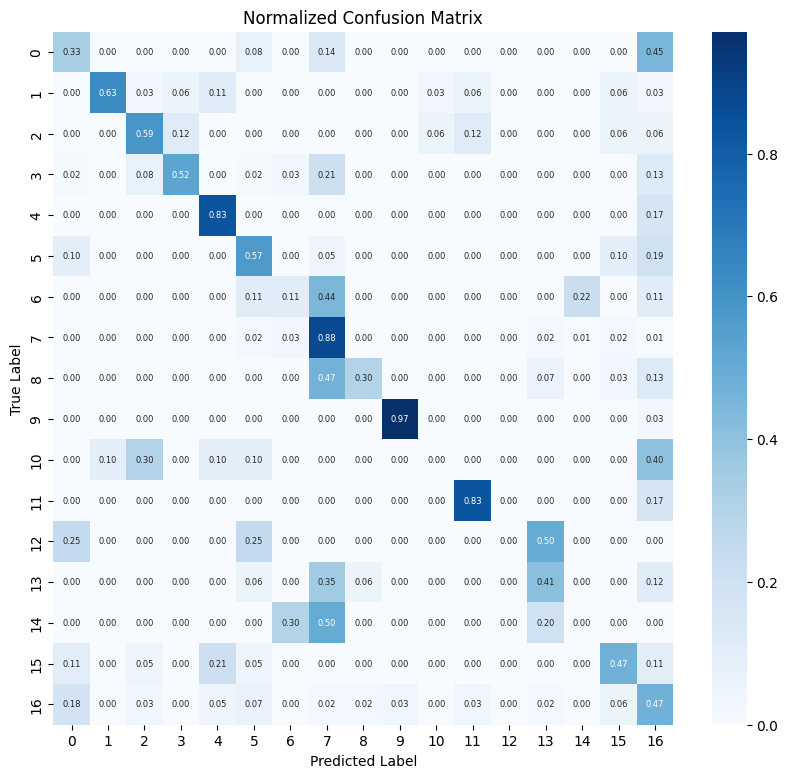

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use the model to predict the labels of the test data
y_predict = model_rf.predict(test_all_features)

# Output classification report
print(classification_report(test_all_labels, y_predict))

# Calculate the confusion matrix
cm = confusion_matrix(test_all_labels, y_predict, labels=np.unique(test_all_labels))

# Normalize the confusion matrix
cm_norm = cm / np.sum(cm, axis=1, keepdims=True)

# Draw a heatmap of the normalized confusion matrix
plt.figure(figsize=(10, 9))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', annot_kws={"fontsize":6}, yticklabels=np.arange(TOTAL_CLASSESS), xticklabels=np.arange(TOTAL_CLASSESS))
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## TEST_ID Results

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# Store results for each test user
test_results = {}

# Iterate through each test user and calculate accuracy and F1 score
for test_user_id, test_kp_df, test_ann_df in zip(TEST_IDS, test_all_kp_data, test_all_ann_data):
    test_features = []
    test_labels = []

    for i in range(len(test_ann_df)):
        # Extract the skeleton point data for the current activity segment
        seg = test_kp_df.loc[int(test_ann_df['start_time'][i] * FS): int(test_ann_df['stop_time'][i] * FS)]
        seg_label = test_ann_df["activityID"].iloc[i]

        if len(seg) > 0 and (len(seg) >= WINDOW_SIZE * FS):
            # Calculate joint angles and distance features
            joint_angles = extract_joint_angles(np.array(seg))
            joint_distances = calculate_joint_distances(np.array(seg))

            # Calculate new features
            hip_distance = calculate_hip_shoulder_distance(np.array(seg))  # Returns distance between hips
            shoulder_distance = calculate_shoulder_distance(np.array(seg))  # Returns distance between shoulders

            # Segment features
            ws_seg = segment(np.array(seg), max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_angles_seg = segment(joint_angles, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            joint_distances_seg = segment(joint_distances, max_time=len(seg), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            hip_distance_seg = segment(hip_distance, max_time=len(hip_distance), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))
            shoulder_distance_seg = segment(shoulder_distance, max_time=len(shoulder_distance), sub_window_size=WINDOW_SIZE * FS, stride_size=int((WINDOW_SIZE - OVERLAP_RATE) * FS))

            # Calculate velocity features for each segment
            velocity_seg = [extract_velocity(ws_seg[i]) for i in range(len(ws_seg))]
            acceleration_seg = [extract_acceleration(ws_seg[i]) for i in range(len(ws_seg))]

            # Extract features from each segment
            feature_seg = [extract_feature(ws_seg[j], FS) for j in range(len(ws_seg))]
            feature_joint_angles_seg = [extract_feature(joint_angles_seg[i], FS) for i in range(len(joint_angles_seg))]
            feature_velocity_seg = [extract_feature(velocity_seg[i], FS) for i in range(len(velocity_seg))]
            feature_joint_distances_seg = [extract_feature(joint_distances_seg[i], FS) for i in range(len(joint_distances_seg))]
            feature_hip_distance_seg = [extract_feature(hip_distance_seg[i], FS) for i in range(len(hip_distance_seg))]
            feature_shoulder_distance_seg = [extract_feature(shoulder_distance_seg[i], FS) for i in range(len(shoulder_distance_seg))]
            feature_acceleration_seg = [extract_feature(acceleration_seg[i], FS) for i in range(len(acceleration_seg))]

            # Ensure all features have the same length
            min_len = min(
                len(feature_seg),
                len(feature_joint_angles_seg),
                len(feature_velocity_seg),
                len(feature_joint_distances_seg),
                len(feature_hip_distance_seg),
                len(feature_shoulder_distance_seg),
                len(feature_acceleration_seg),
            )

            # Combine all features into a single feature vector
            feature_seg_combined = [
                np.concatenate([
                    feature_seg[j],
                    feature_joint_angles_seg[j],
                    feature_velocity_seg[j],
                    feature_joint_distances_seg[j],
                    feature_hip_distance_seg[j],
                    feature_shoulder_distance_seg[j],
                    feature_acceleration_seg[j],
                ])
                for j in range(min_len)
            ]

            # Add features and labels to the final dataset
            test_all_features.extend(feature_seg_combined)
            test_all_labels.extend([seg_label] * min_len)

    # Convert to arrays for prediction
    test_features = np.array(test_all_features)
    test_labels = np.array(test_all_labels)

    # Predict and evaluate for the current user
    y_pred = model_rf.predict(test_features)
    acc = accuracy_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred, average="weighted")

    # Store results
    test_results[test_user_id] = {"Accuracy": acc, "F1-score": f1}

# Create and format results table
results_df = pd.DataFrame(test_results).T
results_df.index.name = 'File'
results_df.loc['TOTAL'] = results_df.mean()
results_df = results_df.round(2)

# Display results with bold headers and TOTAL row
print(f"\033[1m{'File':<8}   {'Accuracy':<10}   {'F1-score':<10}\033[0m")
print(" ")
for idx, row in results_df.iterrows():
    if idx == 'TOTAL':
        print(" ")
        print(f"\033[1m{idx:<8}   {row['Accuracy']:<10.2f}   {row['F1-score']:<10.2f}\033[0m")
    else:
        print(f"{idx:<8}   {row['Accuracy']:<10.2f}   {row['F1-score']:<10.2f}")
print(" ")

File       Accuracy     F1-score  
 
T1N02      0.56         0.55      
T1F02      0.57         0.56      
 
TOTAL      0.57         0.55      
 
